## importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading the time series data

In [73]:
data = pd.read_csv('Walmart Dataset.csv')

## EDA

In [74]:
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [75]:
data.shape

(6435, 8)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [77]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [78]:
#converting 'date' column to a datetime type

data['Date'] = pd.to_datetime(data['Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_4308\4189245697.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [80]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [81]:
data.duplicated().sum()

0

In [82]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [83]:
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [84]:
data_store_sales = data

In [85]:
# Group weekly sales by date column.
data_store_sales.set_index('Date',inplace = True)

In [86]:
data_store_sales

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28     45     713173.95             0        64.88       3.997   
2012-05-10     45     733455.07             0        64.89       3.985   
2012-12-10     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106  
...                ...           ...  
2012-09-28  192.013558         8.684  
2012-05-10  192.170412         8.667  
2012-12-10  192.327265         8.667  
2012-10-19  192.330854         8.667  
2012-10-26  192.308899         8.667  

[6435 rows x 7 columns]

In [87]:
store_nos=data_store_sales['Store'].unique()

In [88]:
store_nos

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?


In [90]:
for i in store_nos:
    print(f'store-{i}:')
    print(data_store_sales[data_store_sales['Store']==i][['Weekly_Sales','Unemployment']].corr().iloc[-1:,0:1])


store-1:
              Weekly_Sales
Unemployment     -0.097955
store-2:
              Weekly_Sales
Unemployment      0.066325
store-3:
              Weekly_Sales
Unemployment     -0.230413
store-4:
              Weekly_Sales
Unemployment     -0.337015
store-5:
              Weekly_Sales
Unemployment     -0.207043
store-6:
              Weekly_Sales
Unemployment      0.044251
store-7:
              Weekly_Sales
Unemployment     -0.165382
store-8:
              Weekly_Sales
Unemployment      -0.05258
store-9:
              Weekly_Sales
Unemployment     -0.191534
store-10:
              Weekly_Sales
Unemployment      0.131908
store-11:
              Weekly_Sales
Unemployment     -0.020339
store-12:
              Weekly_Sales
Unemployment     -0.009286
store-13:
              Weekly_Sales
Unemployment     -0.171633
store-14:
              Weekly_Sales
Unemployment      0.210786
store-15:
              Weekly_Sales
Unemployment      0.078905
store-16:
              Weekly_Sales
Unemployment

### Most of the stores apart from the store 36,38 and 44 have correlation values close to 0 which shows weak correlation. When the correlation is negative(as in store 38 and 44) it indicates that as unemployment rate increases wekkly sales decreases. When the correlation is positive(as in store 36) it idicates that as unemployment rate increases weekly sales also increases. 

### Store 38 and 44 are the most affected

## b. If the weekly sales show a seasonal trend, when and what could be the reason?

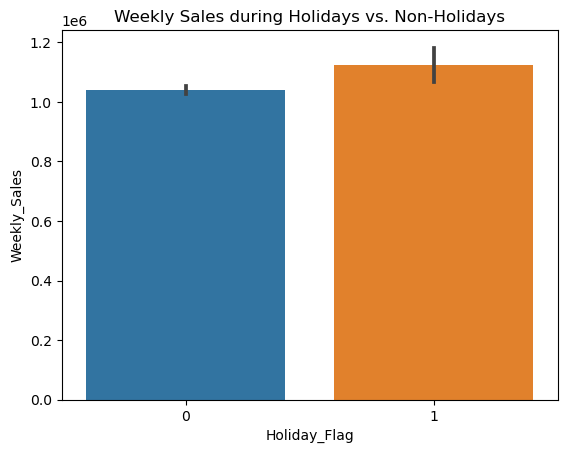

In [101]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=data)

plt.title('Weekly Sales during Holidays vs. Non-Holidays')
plt.xlabel('Holiday_Flag')
plt.ylabel('Weekly_Sales')

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4308\1556370693.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


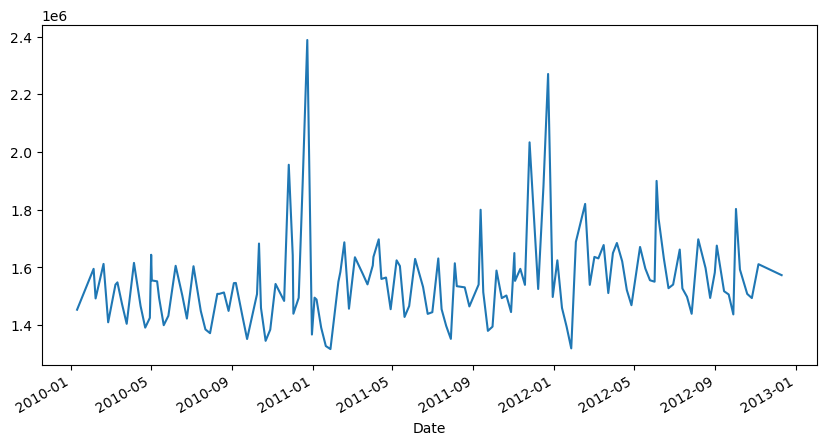

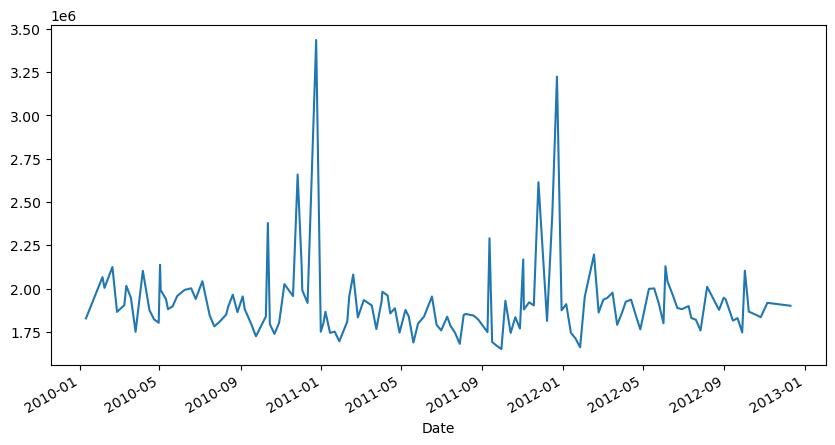

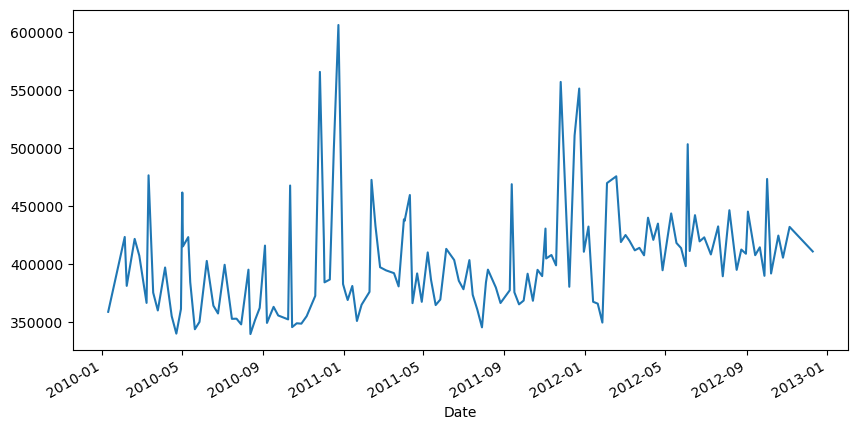

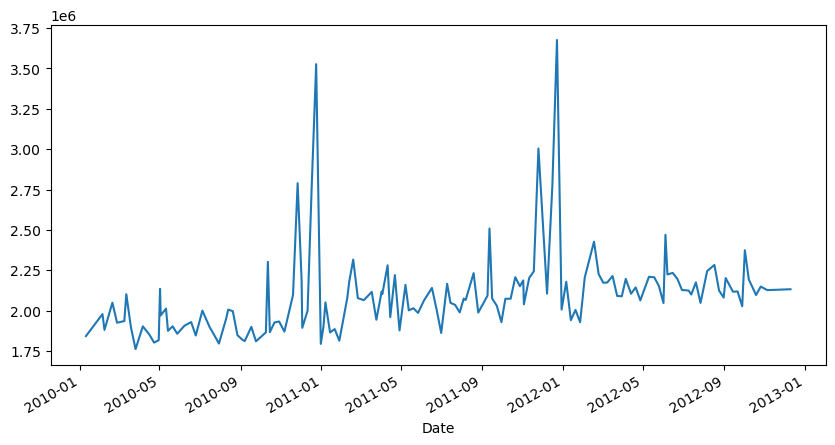

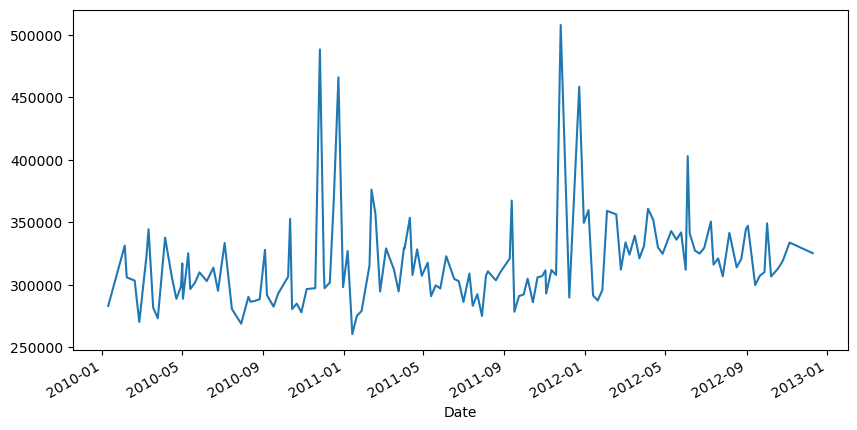

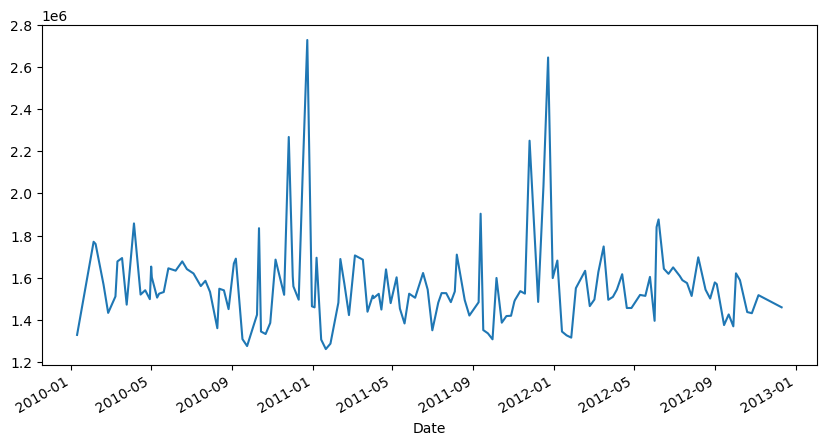

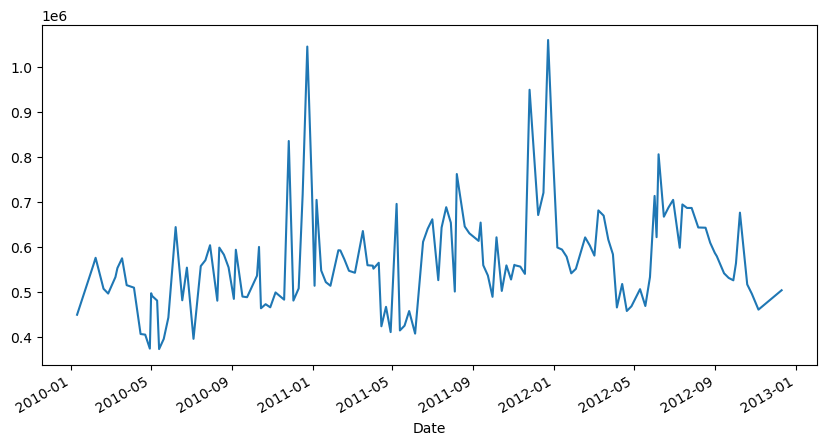

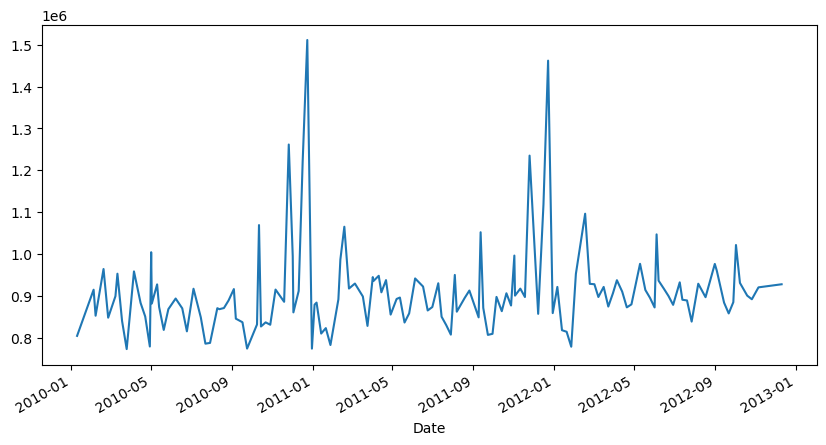

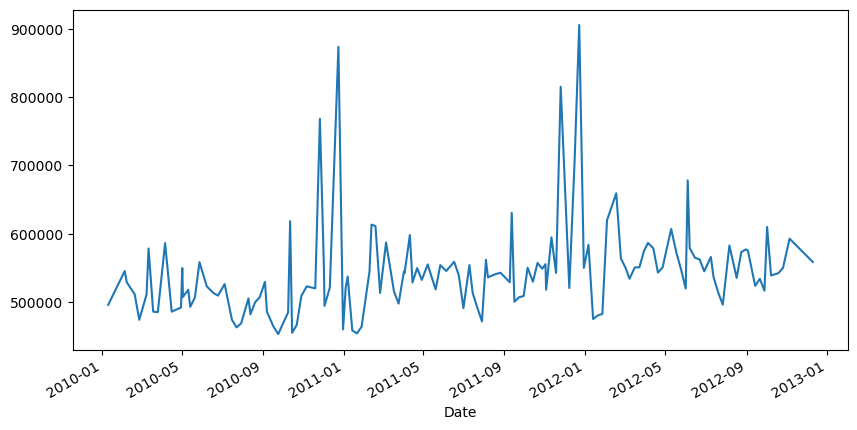

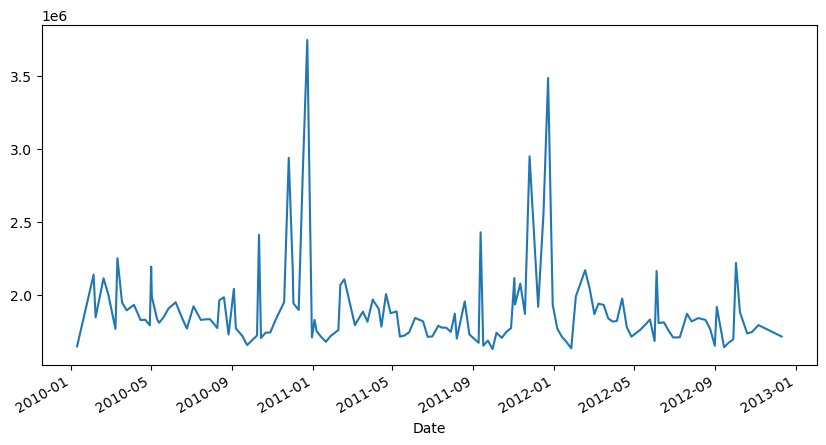

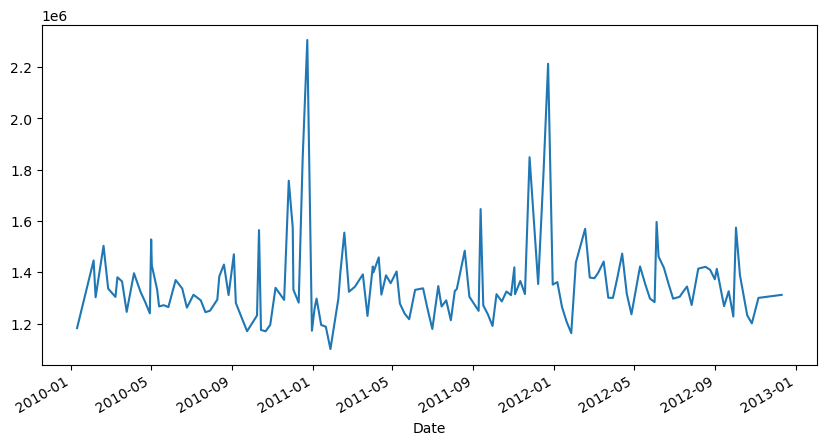

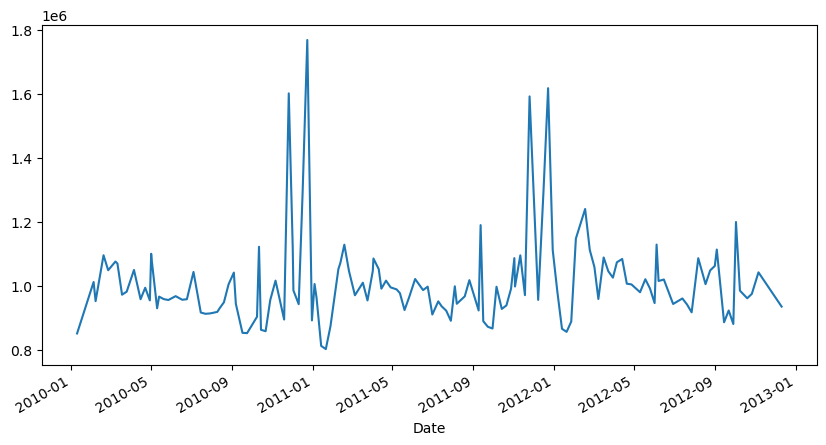

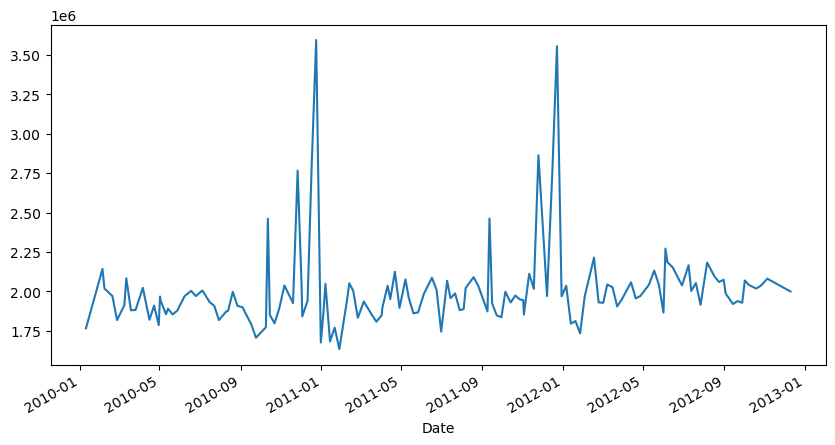

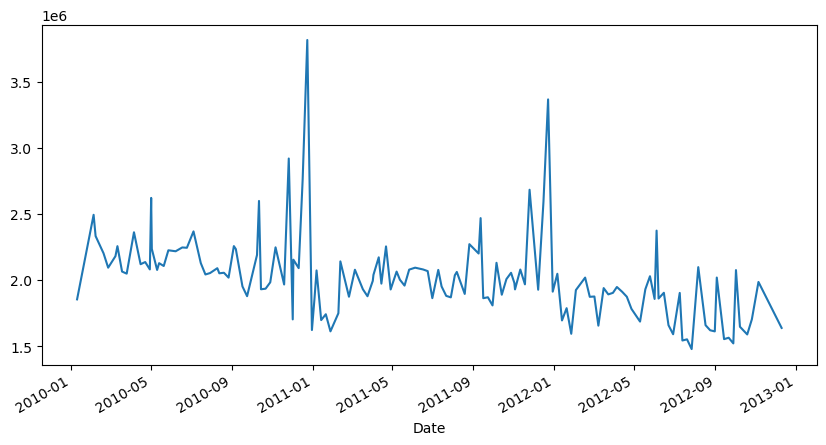

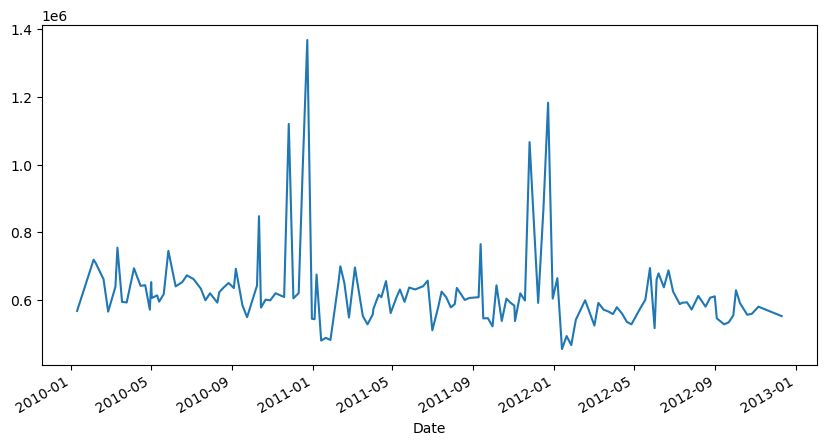

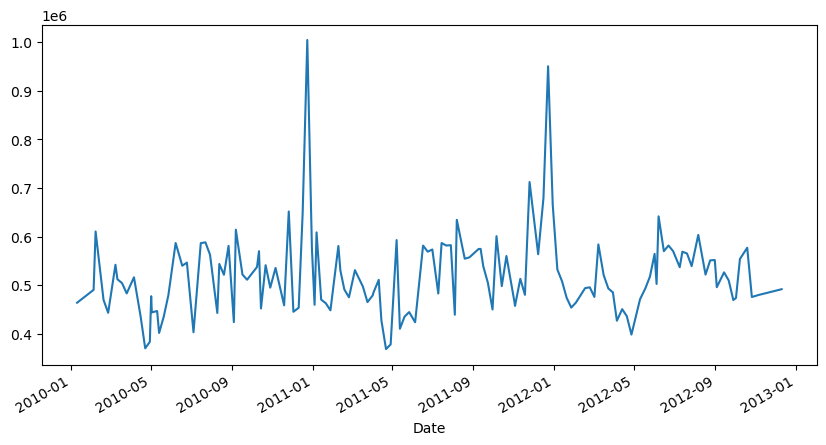

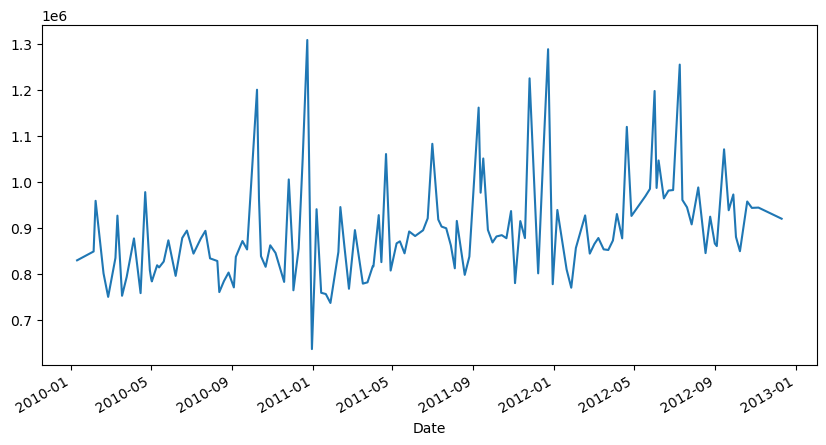

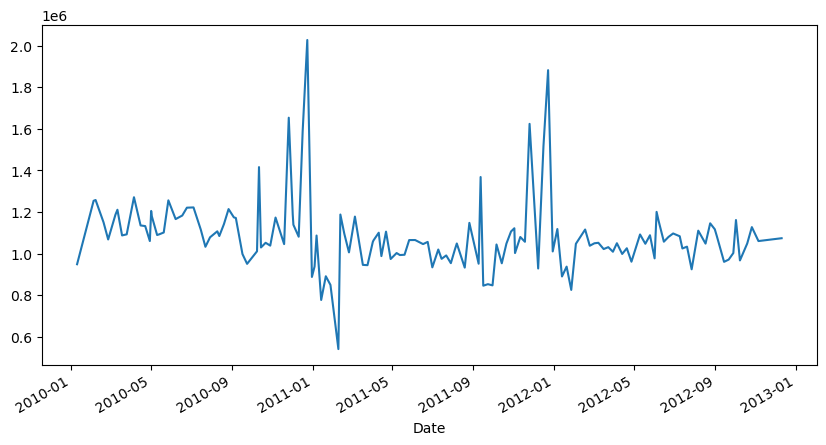

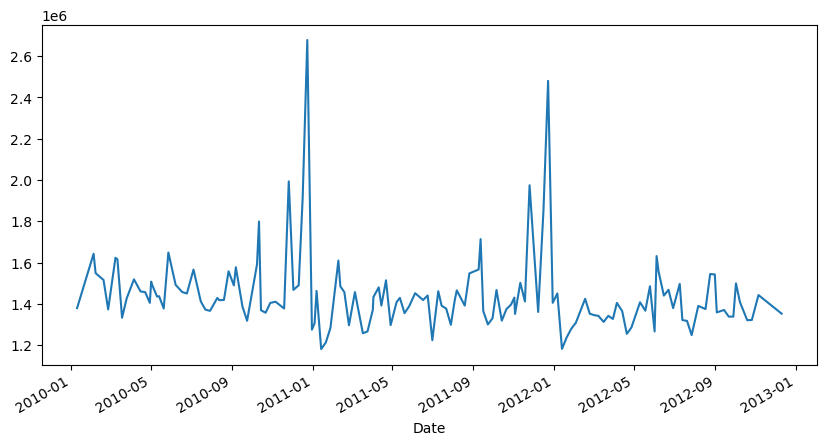

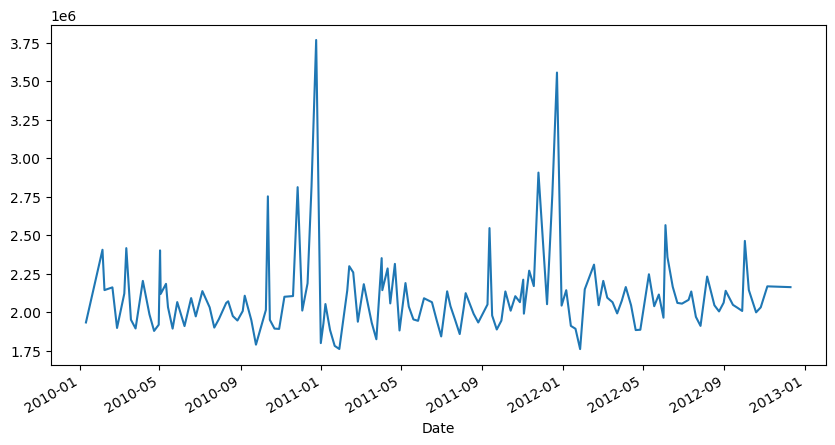

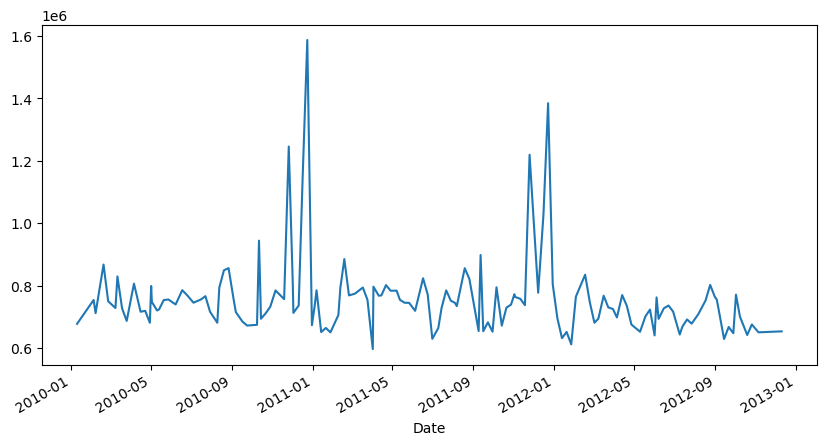

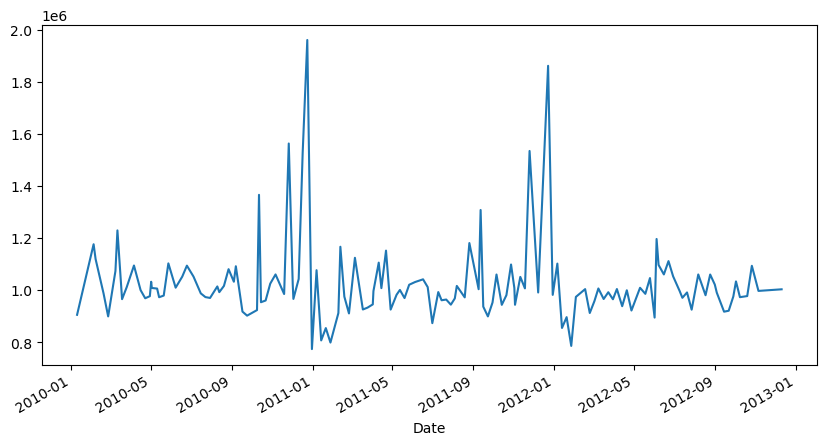

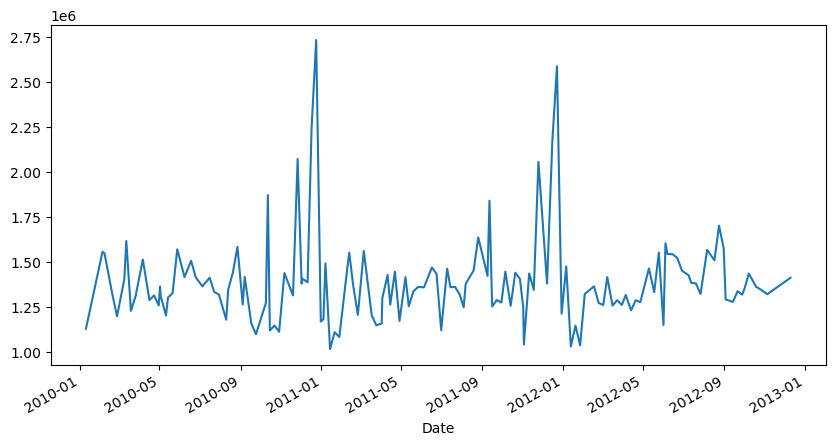

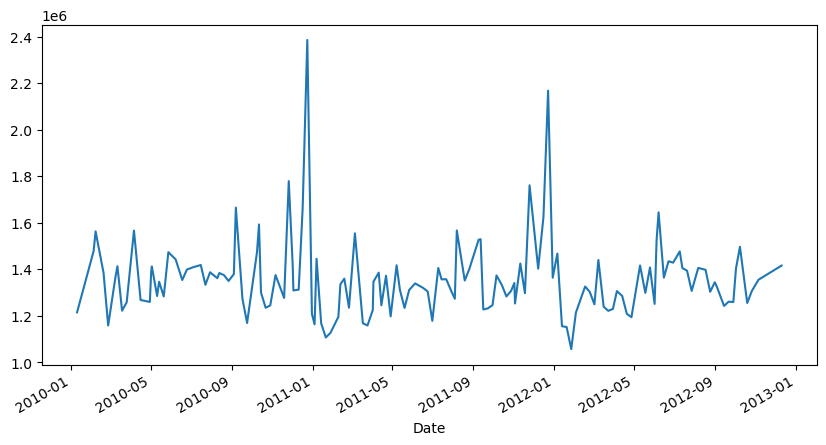

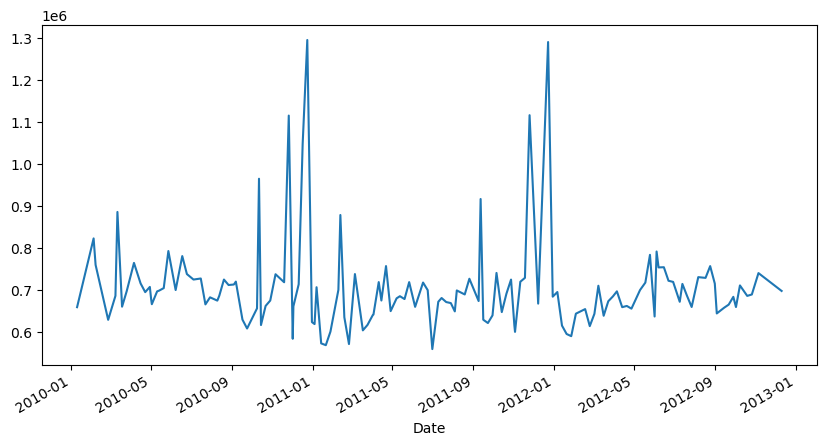

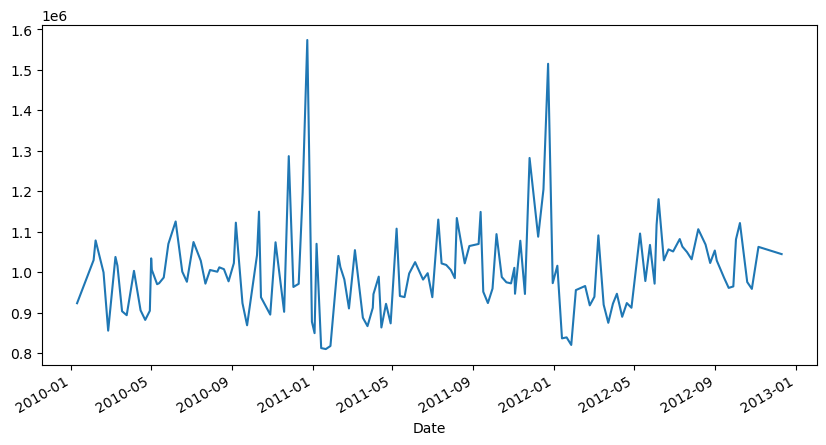

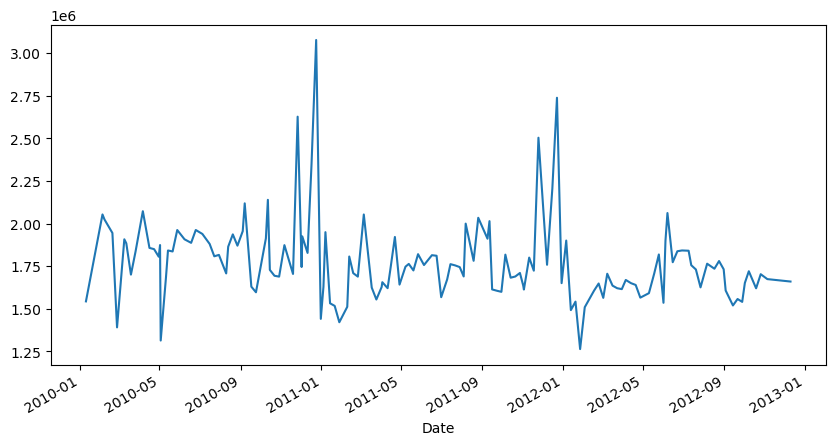

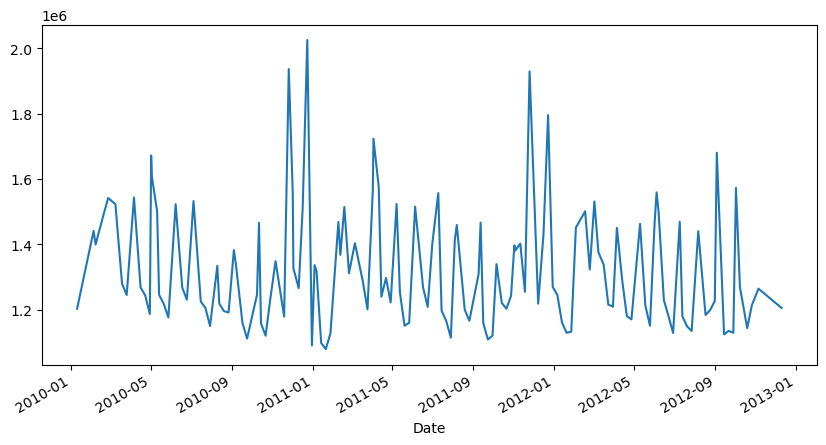

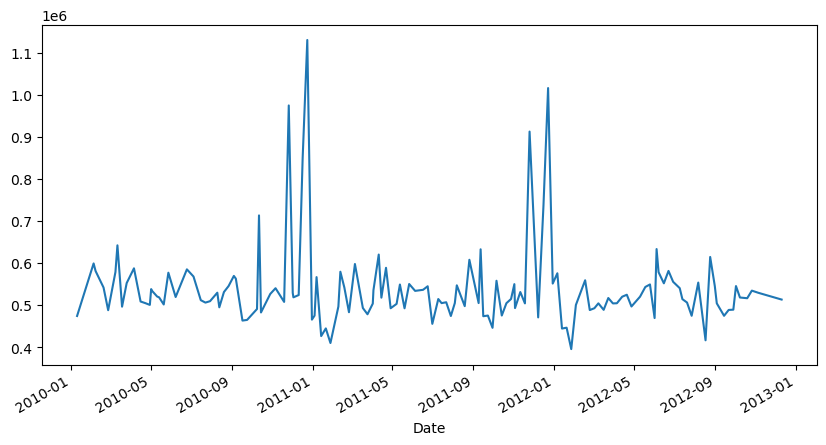

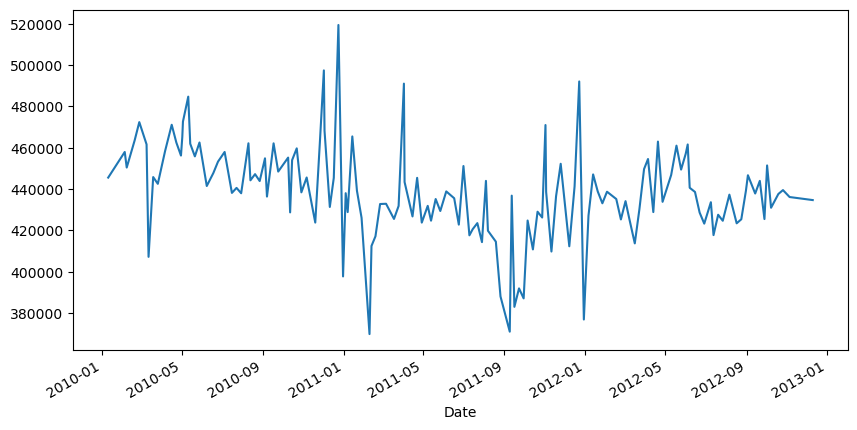

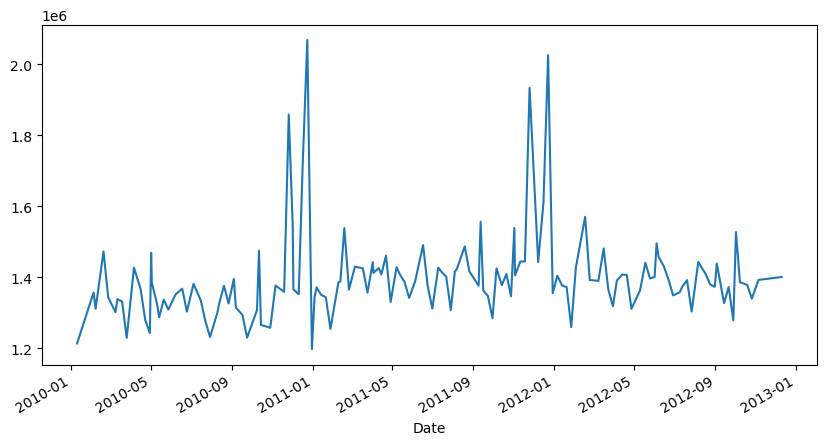

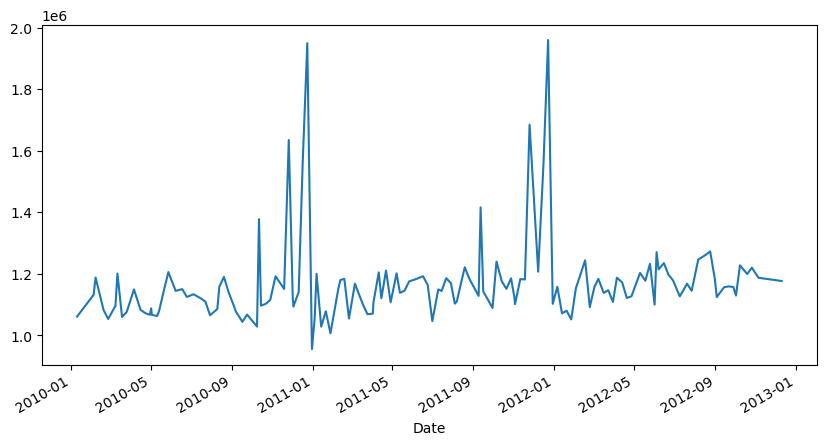

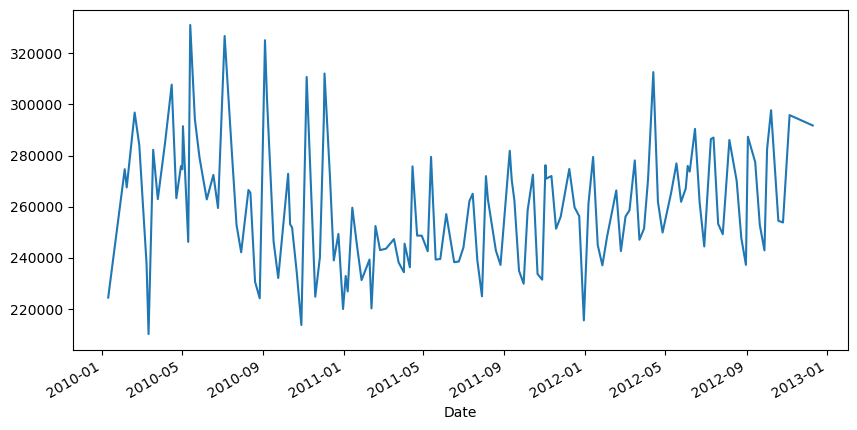

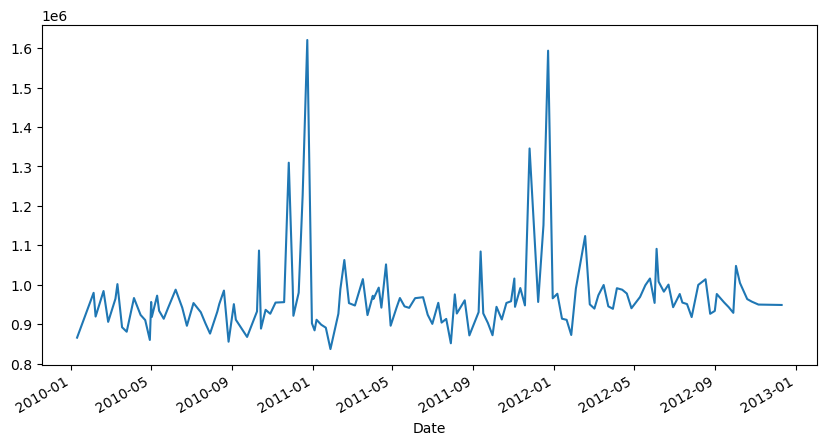

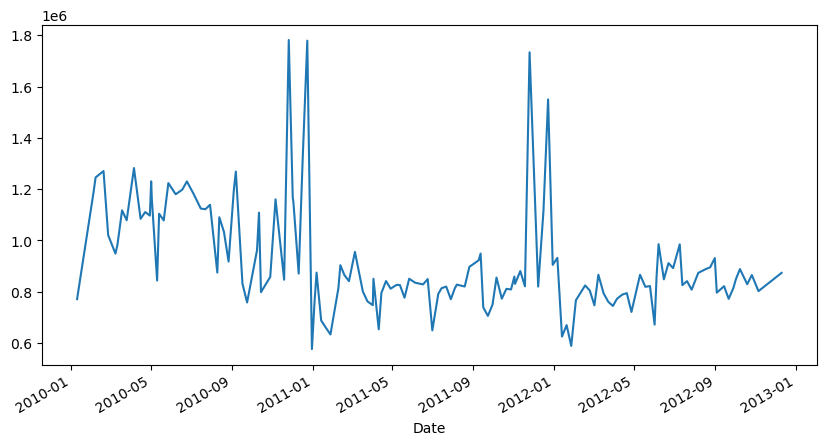

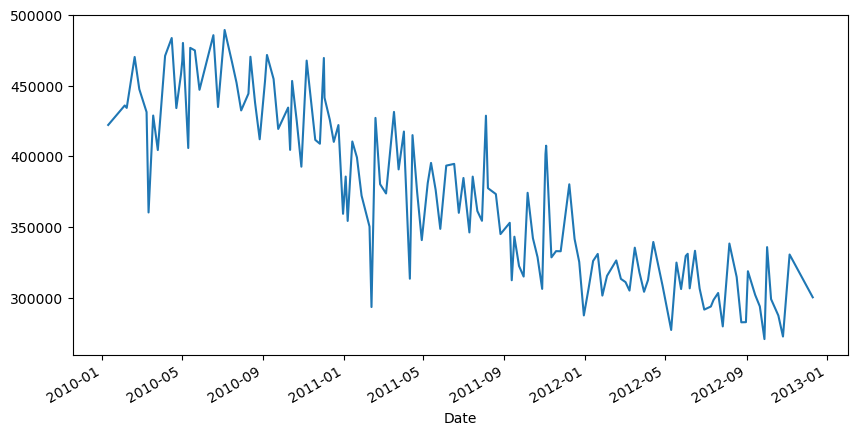

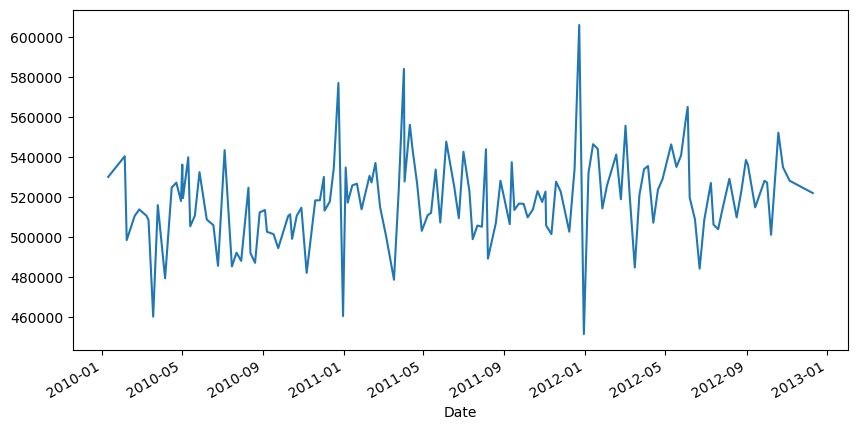

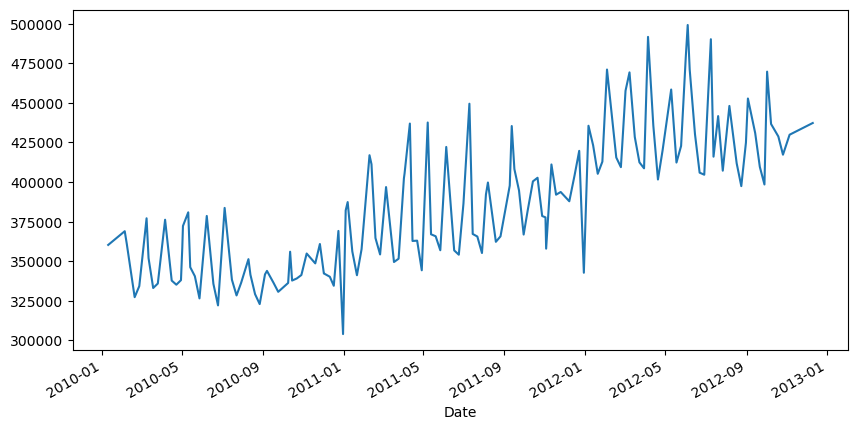

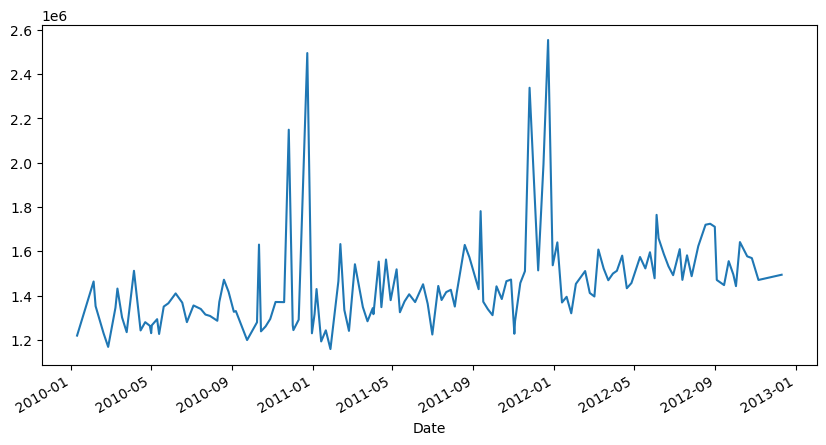

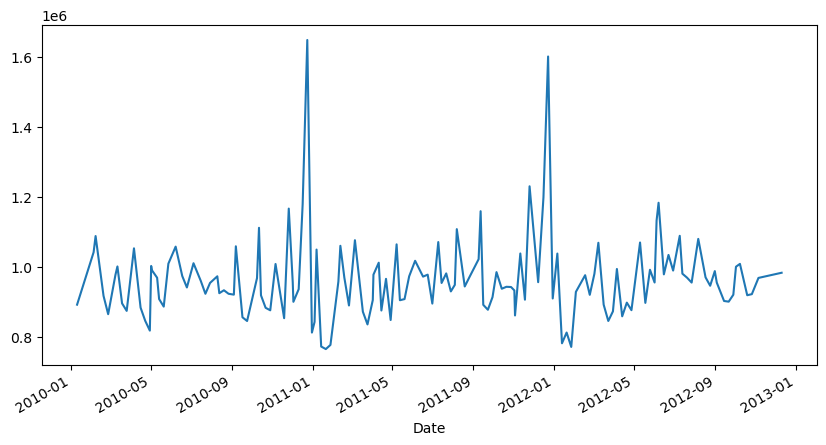

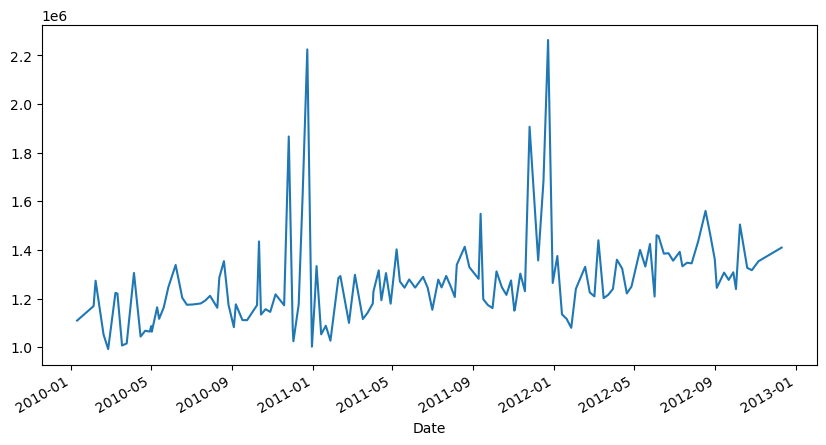

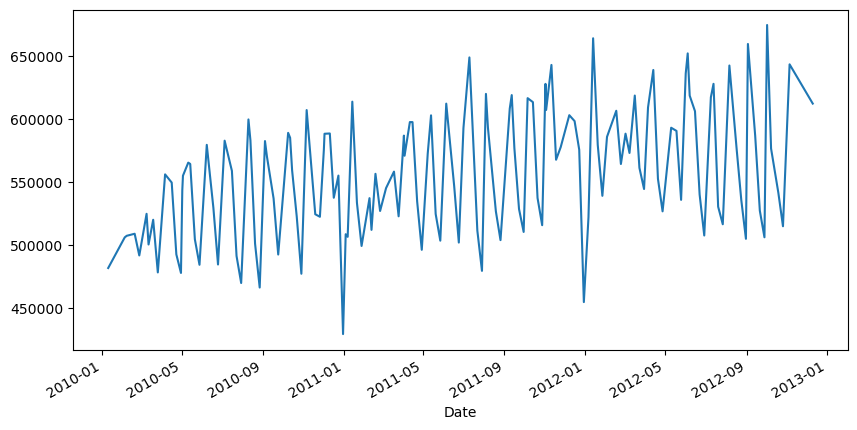

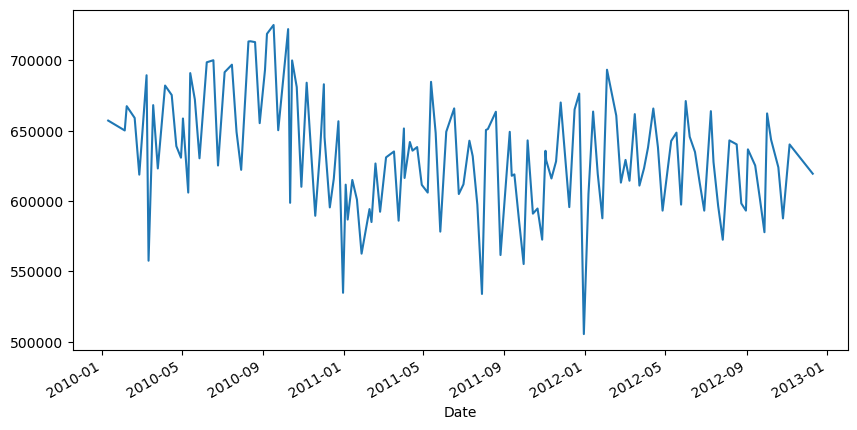

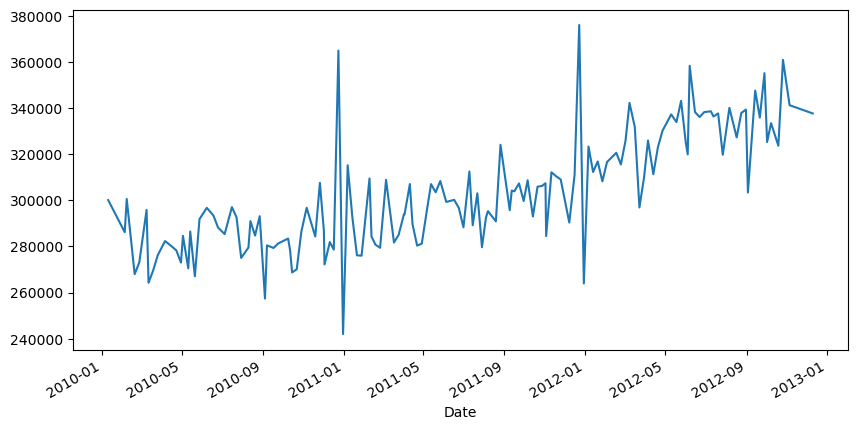

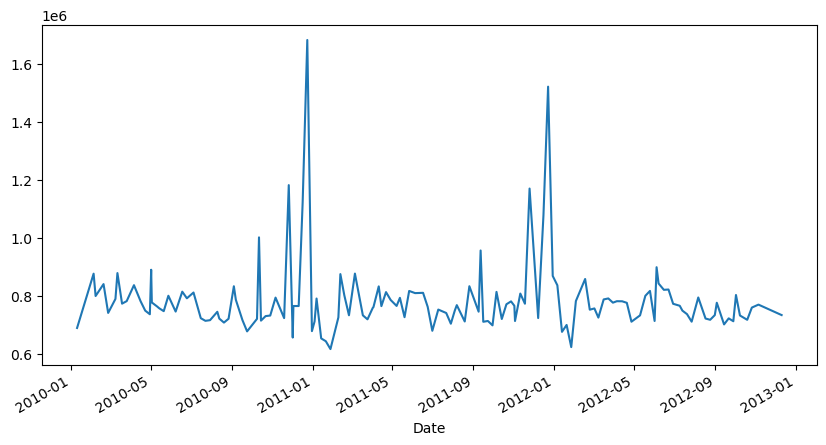

In [102]:
for i in store_nos:
    plt.figure(figsize=(10,5))
    data_store_sales[data_store_sales['Store']==i].Weekly_Sales.plot()

### From the barplot we can see that there is some increase in weekly_sales during holidays.
### From the line plot of 45 stores we can see rise in weekly sales from october till february every year. 

## c. Does temperature affect the weekly sales in any manner?

In [105]:
for i in store_nos:
    print(f'store-{i}:')
    print(data_store_sales[data_store_sales['Store']==i][['Weekly_Sales','Temperature']].corr().iloc[-1:,0:1])


store-1:
             Weekly_Sales
Temperature     -0.222701
store-2:
             Weekly_Sales
Temperature     -0.297673
store-3:
             Weekly_Sales
Temperature     -0.377524
store-4:
             Weekly_Sales
Temperature     -0.225583
store-5:
             Weekly_Sales
Temperature     -0.175517
store-6:
             Weekly_Sales
Temperature     -0.084863
store-7:
             Weekly_Sales
Temperature      0.015077
store-8:
             Weekly_Sales
Temperature     -0.312324
store-9:
             Weekly_Sales
Temperature     -0.208343
store-10:
             Weekly_Sales
Temperature     -0.432569
store-11:
             Weekly_Sales
Temperature     -0.278503
store-12:
             Weekly_Sales
Temperature     -0.379416
store-13:
             Weekly_Sales
Temperature     -0.137746
store-14:
             Weekly_Sales
Temperature     -0.199851
store-15:
             Weekly_Sales
Temperature     -0.050541
store-16:
             Weekly_Sales
Temperature      0.182948
store-17:
       

### Correlation between Temperature and Weekly Sales is very less or close to zero.Therefore temperature doesnot affect weekly sales much

## d. How is the Consumer Price index affecting the weekly sales of various stores?

In [106]:
for i in store_nos:
    print(f'store-{i}:')
    print(data_store_sales[data_store_sales['Store']==i][['Weekly_Sales','CPI']].corr().iloc[-1:,0:1])

store-1:
     Weekly_Sales
CPI      0.225408
store-2:
     Weekly_Sales
CPI     -0.062431
store-3:
     Weekly_Sales
CPI       0.31725
store-4:
     Weekly_Sales
CPI      0.351157
store-5:
     Weekly_Sales
CPI      0.308261
store-6:
     Weekly_Sales
CPI     -0.011357
store-7:
     Weekly_Sales
CPI      0.289044
store-8:
     Weekly_Sales
CPI      0.120255
store-9:
     Weekly_Sales
CPI      0.294805
store-10:
     Weekly_Sales
CPI     -0.115374
store-11:
     Weekly_Sales
CPI      0.069781
store-12:
     Weekly_Sales
CPI      0.084087
store-13:
     Weekly_Sales
CPI      0.163976
store-14:
     Weekly_Sales
CPI     -0.419755
store-15:
     Weekly_Sales
CPI     -0.174467
store-16:
     Weekly_Sales
CPI      0.124285
store-17:
     Weekly_Sales
CPI      0.348571
store-18:
     Weekly_Sales
CPI     -0.193541
store-19:
     Weekly_Sales
CPI     -0.155341
store-20:
     Weekly_Sales
CPI      0.058706
store-21:
     Weekly_Sales
CPI     -0.163649
store-22:
     Weekly_Sales
CPI     -0.0386

### Correlation between CPI and Weekly Sales is very less or close to zero except for stores 36,38 and 44. When the correlation is negative(as in store 36) it indicates that as temperature increases wekkly sales decreases. When the correlation is positive(as in store 38 and 44) it idicates that as temperature increases weekly sales also increases.

## e. Top performing stores according to the historical data.

In [112]:
store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False)
print(top_stores.to_string(index=False))
print(top_stores)

 Store  Weekly_Sales
    20  301397792.46
     4  299543953.38
    14  288999911.34
    13  286517703.80
     2  275382440.98
    10  271617713.89
    27  253855916.88
     6  223756130.64
     1  222402808.85
    39  207445542.47
    19  206634862.10
    31  199613905.50
    23  198750617.85
    24  194016021.28
    11  193962786.80
    28  189263680.58
    41  181341934.89
    32  166819246.16
    18  155114734.21
    22  147075648.57
    12  144287230.15
    26  143416393.79
    34  138249763.00
    40  137870309.79
    35  131520672.08
     8  129951181.13
    17  127782138.83
    45  112395341.42
    21  108117878.92
    25  101061179.17
    43   90565435.41
    15   89133683.92
     7   81598275.14
    42   79565752.43
     9   77789218.99
    29   77141554.31
    16   74252425.40
    37   74202740.32
    30   62716885.12
     3   57586735.07
    38   55159626.42
    36   53412214.97
     5   45475688.90
    44   43293087.84
    33   37160221.96
    Store  Weekly_Sales
19     20 

## f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [115]:
worst_store = top_stores.sort_values(by='Weekly_Sales', ascending=True).iloc[0]
highest_sales = top_stores.iloc[0]['Weekly_Sales']
lowest_sales = worst_store['Weekly_Sales']
difference = highest_sales - lowest_sales
print("Worst Performing Store:")
print(worst_store)

Worst Performing Store:
Store                 33.00
Weekly_Sales    37160221.96
Name: 32, dtype: float64


In [116]:
print("\nDifference Between Highest and Lowest Performing Stores:")
print(f"Difference: {difference}")


Difference Between Highest and Lowest Performing Stores:
Difference: 264237570.49999997


## Second Part of the Question

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data1 = pd.read_csv('Walmart Dataset.csv')

### EDA

In [46]:
data1.head(20)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1  05-02-2010    1643690.90             0        42.31       2.572   
1       1  12-02-2010    1641957.44             1        38.51       2.548   
2       1  19-02-2010    1611968.17             0        39.93       2.514   
3       1  26-02-2010    1409727.59             0        46.63       2.561   
4       1  05-03-2010    1554806.68             0        46.50       2.625   
5       1  12-03-2010    1439541.59             0        57.79       2.667   
6       1  19-03-2010    1472515.79             0        54.58       2.720   
7       1  26-03-2010    1404429.92             0        51.45       2.732   
8       1  02-04-2010    1594968.28             0        62.27       2.719   
9       1  09-04-2010    1545418.53             0        65.86       2.770   
10      1  16-04-2010    1466058.28             0        66.32       2.808   
11      1  23-04-2010    1391256.12             0        64.84       2.795   
12      1  30-04-2010    1425100.71             0        67.41       2.780   
13      1  07-05-2010    1603955.12             0        72.55       2.835   
14      1  14-05-2010    1494251.50             0        74.78       2.854   
15      1  21-05-2010    1399662.07             0        76.44       2.826   
16      1  28-05-2010    1432069.95             0        80.44       2.759   
17      1  04-06-2010    1615524.71             0        80.69       2.705   
18      1  11-06-2010    1542561.09             0        80.43       2.668   
19      1  18-06-2010    1503284.06             0        84.11       2.637   

           CPI  Unemployment  
0   211.096358         8.106  
1   211.242170         8.106  
2   211.289143         8.106  
3   211.319643         8.106  
4   211.350143         8.106  
5   211.380643         8.106  
6   211.215635         8.106  
7   211.018042         8.106  
8   210.820450         7.808  
9   210.622857         7.808  
10  210.488700         7.808  
11  210.439123         7.808  
12  210.389546         7.808  
13  210.339968         7.808  
14  210.337426         7.808  
15  210.617093         7.808  
16  210.896761         7.808  
17  211.176428         7.808  
18  211.456095         7.808  
19  211.453772         7.808

In [47]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [48]:
data1['Date'] = pd.to_datetime(data1['Date'], format='%d-%m-%Y')
data1.set_index('Date',inplace = True)

In [49]:
data1

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28     45     713173.95             0        64.88       3.997   
2012-10-05     45     733455.07             0        64.89       3.985   
2012-10-12     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106  
...                ...           ...  
2012-09-28  192.013558         8.684  
2012-10-05  192.170412         8.667  
2012-10-12  192.327265         8.667  
2012-10-19  192.330854         8.667  
2012-10-26  192.308899         8.667  

[6435 rows x 7 columns]

C:\Users\HP\AppData\Local\Temp\ipykernel_3392\3096686939.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


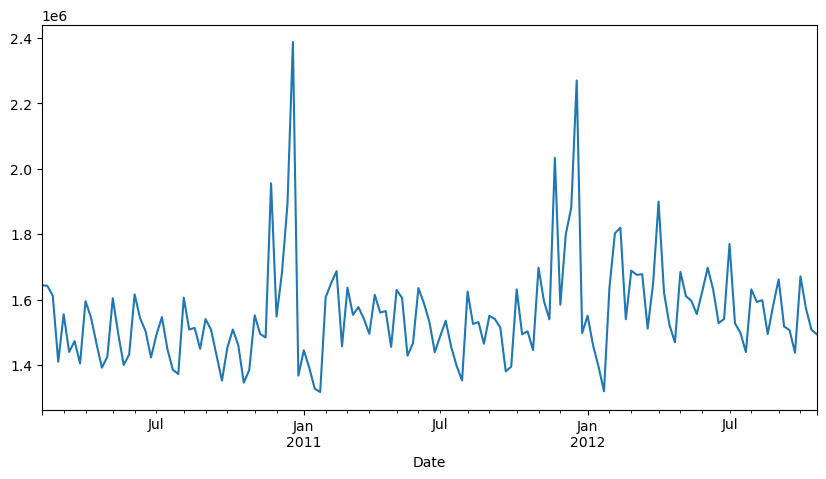

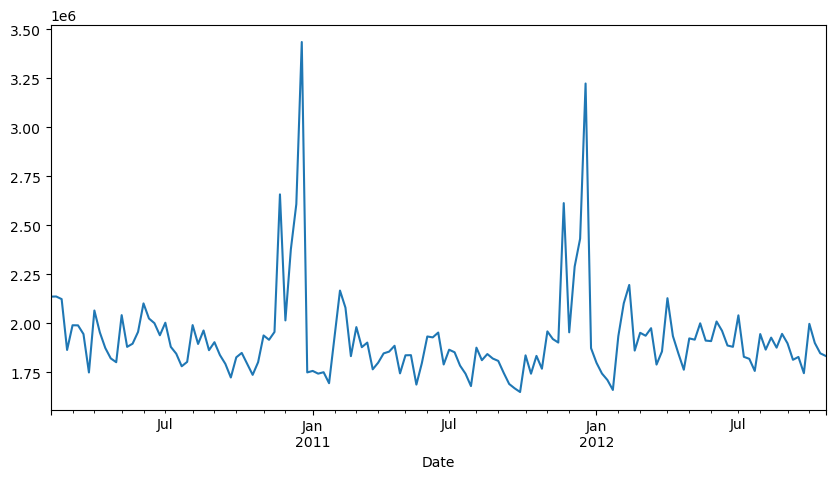

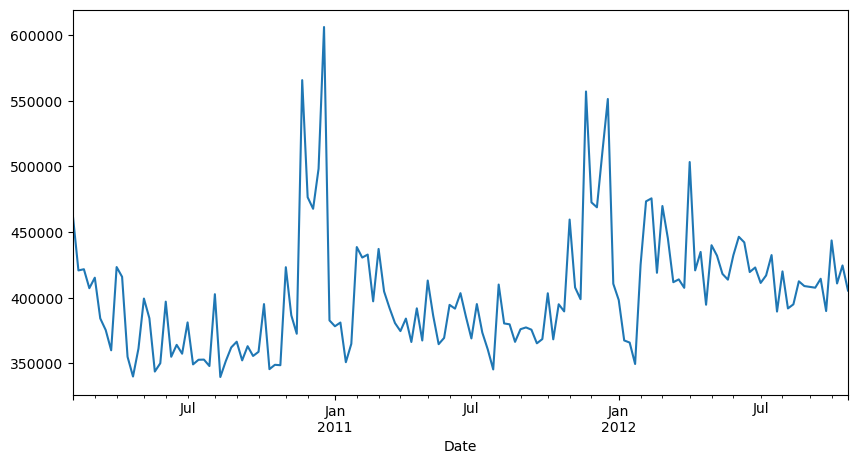

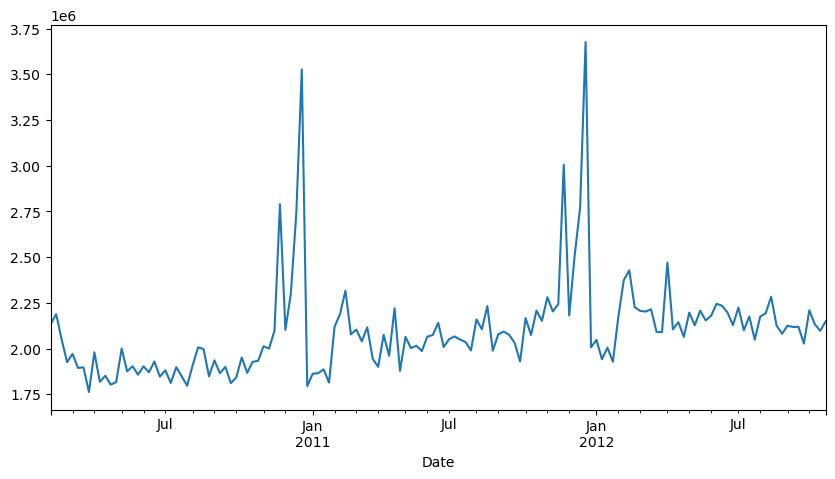

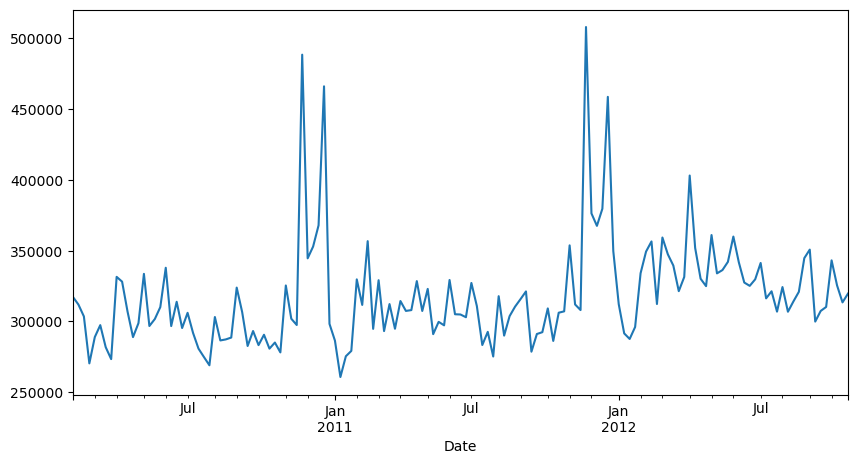

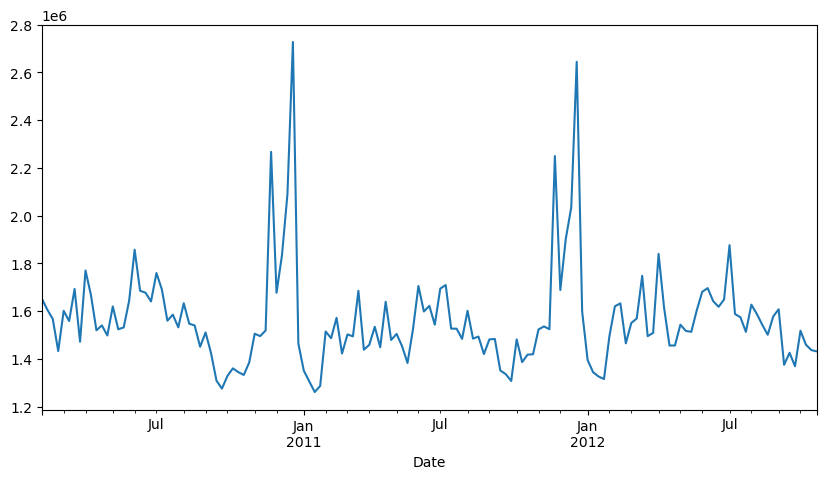

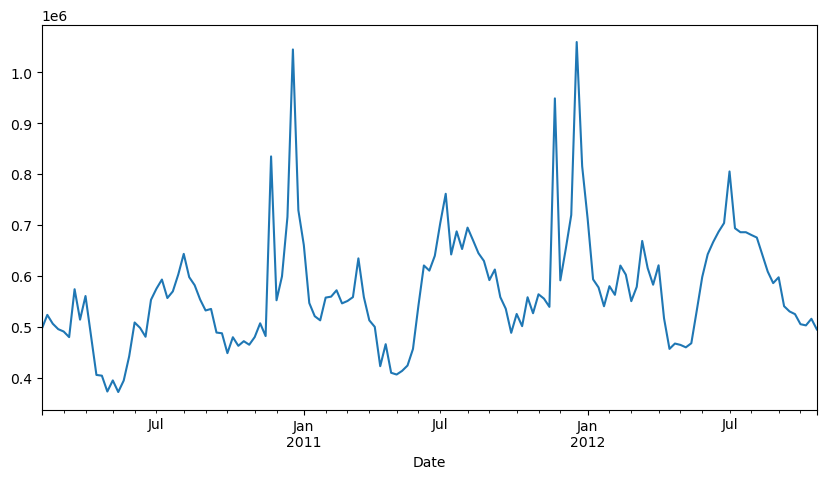

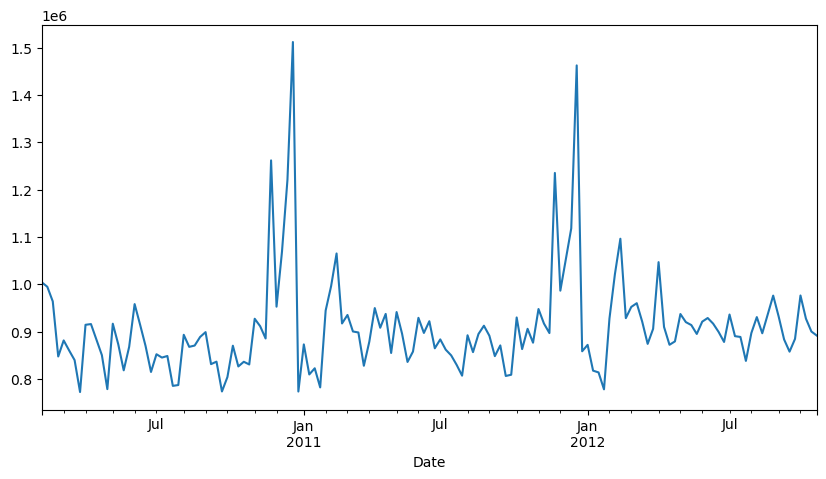

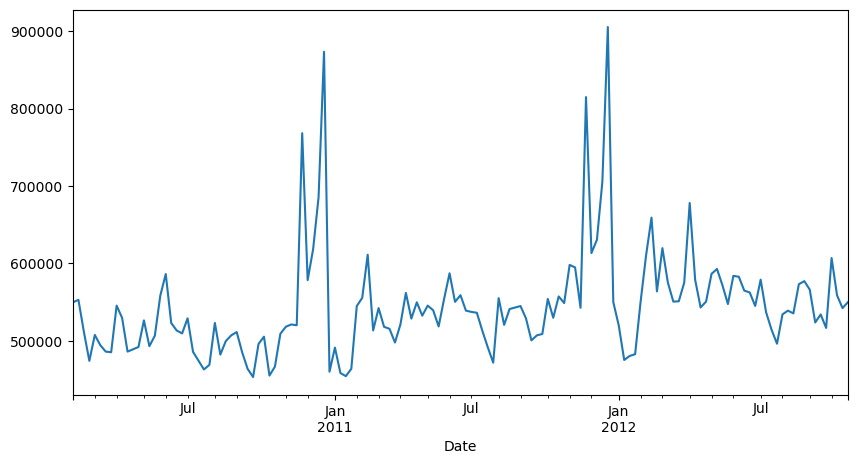

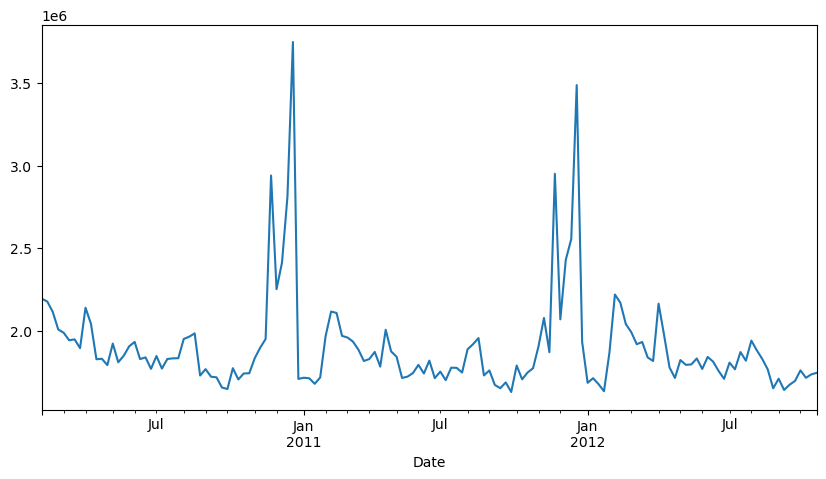

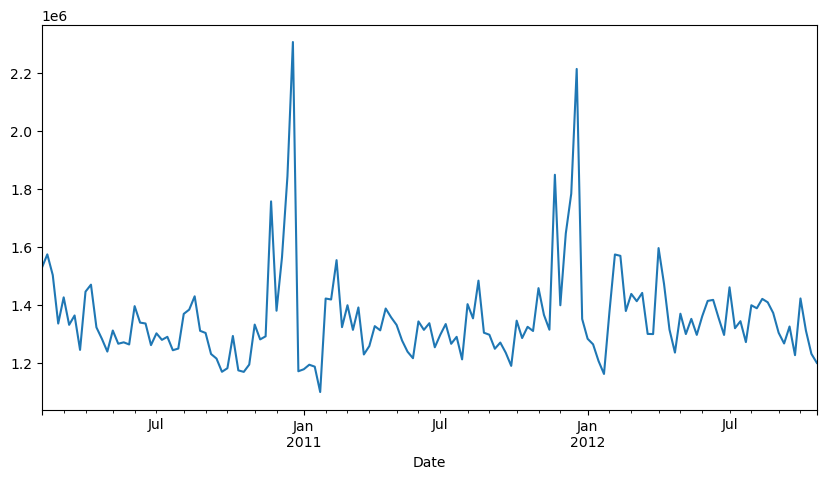

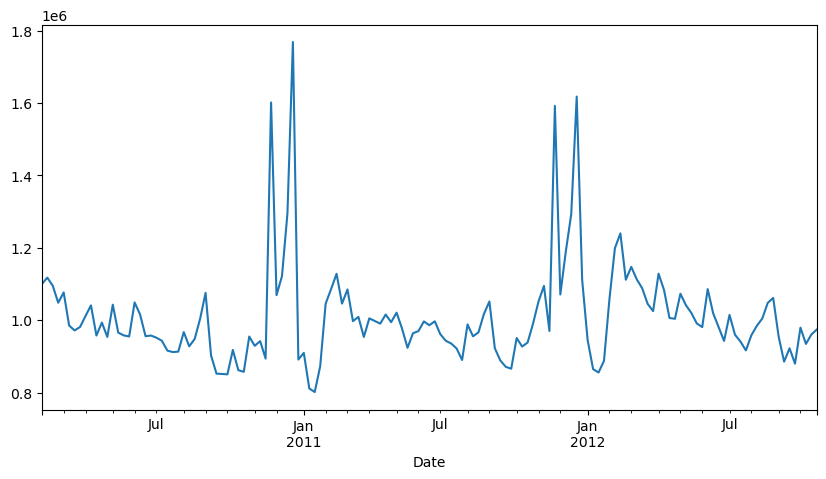

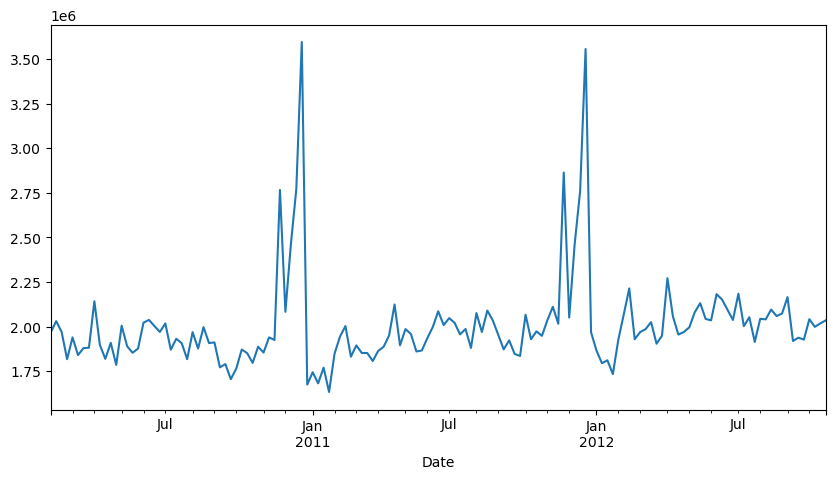

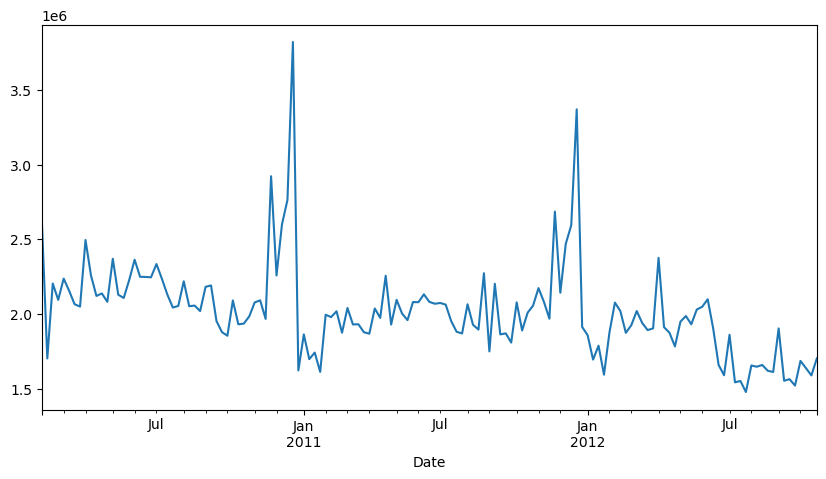

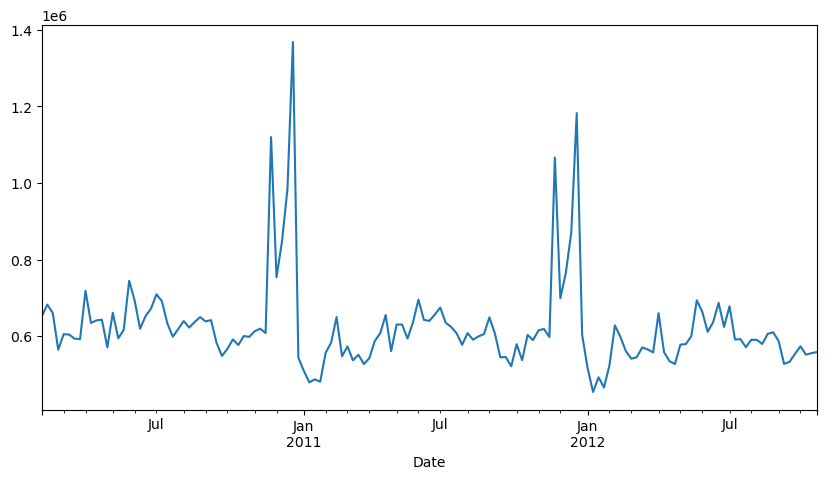

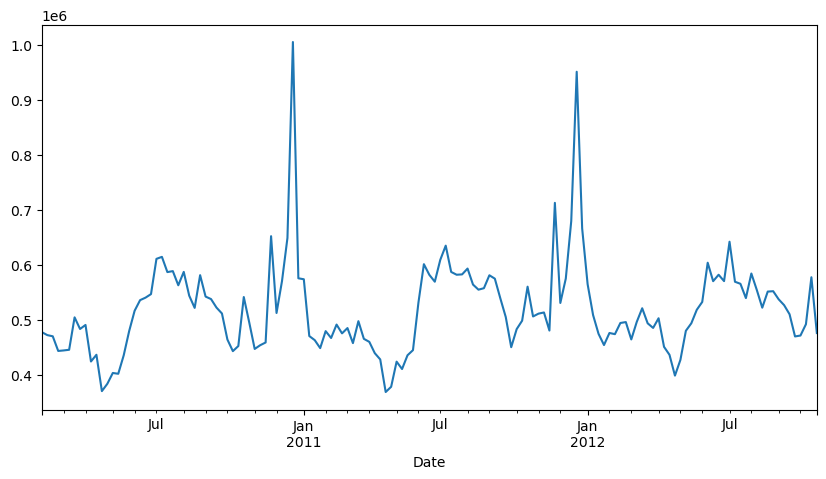

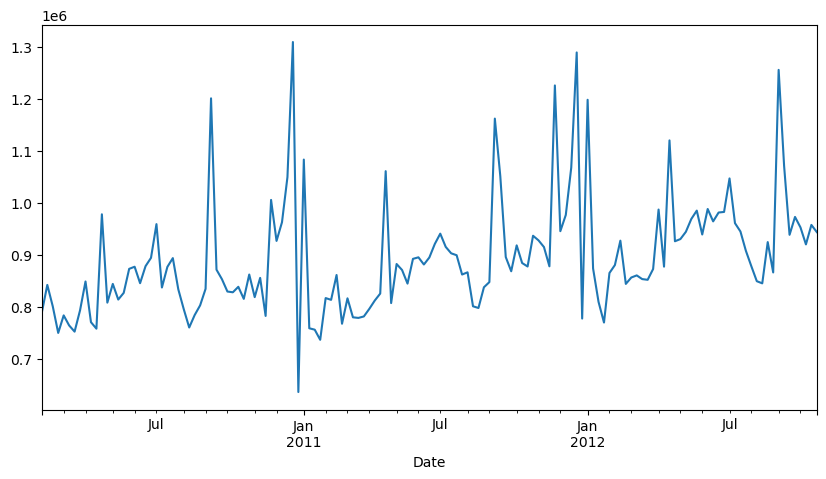

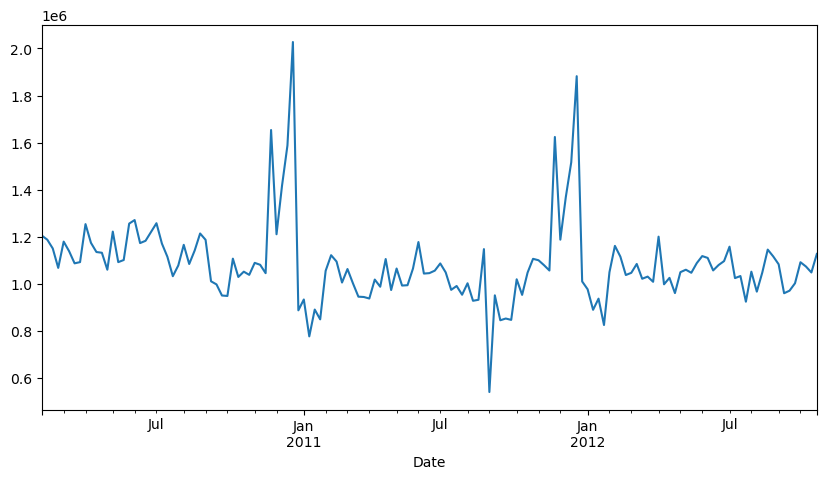

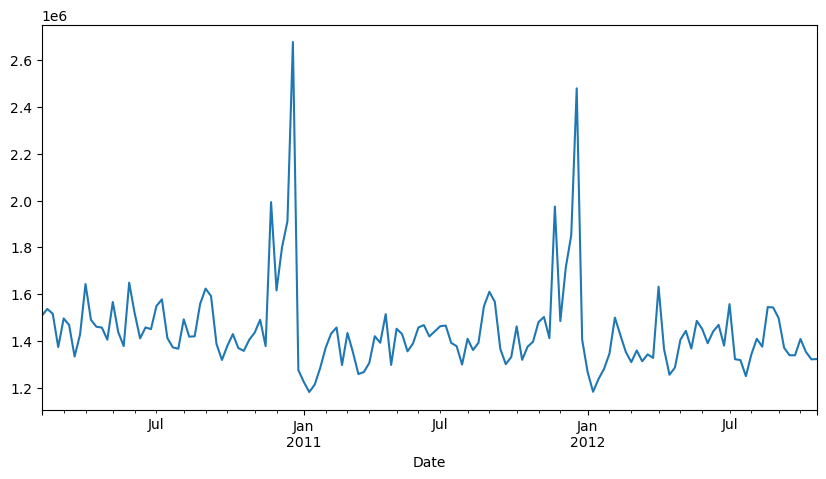

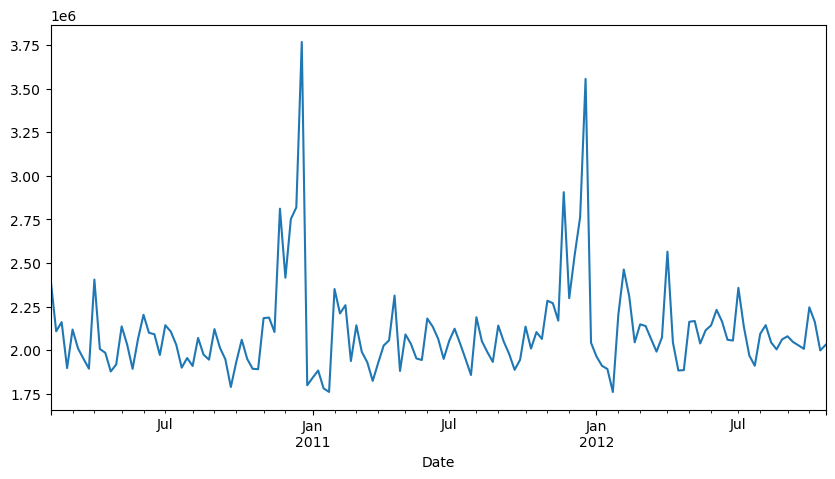

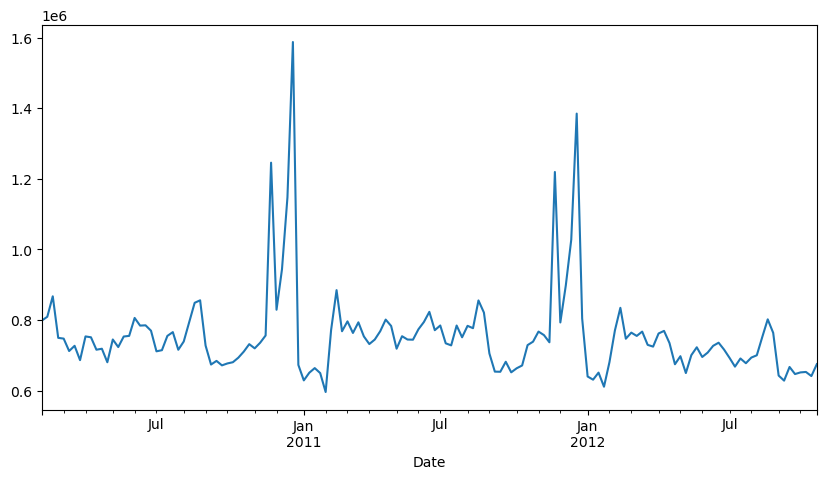

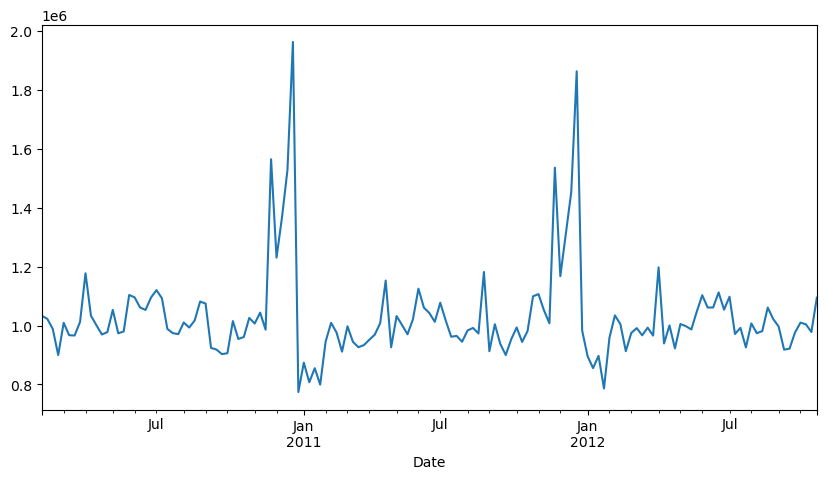

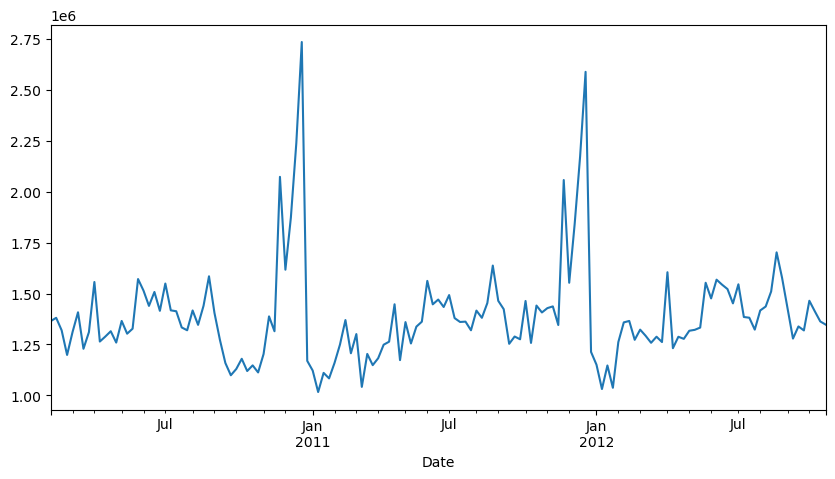

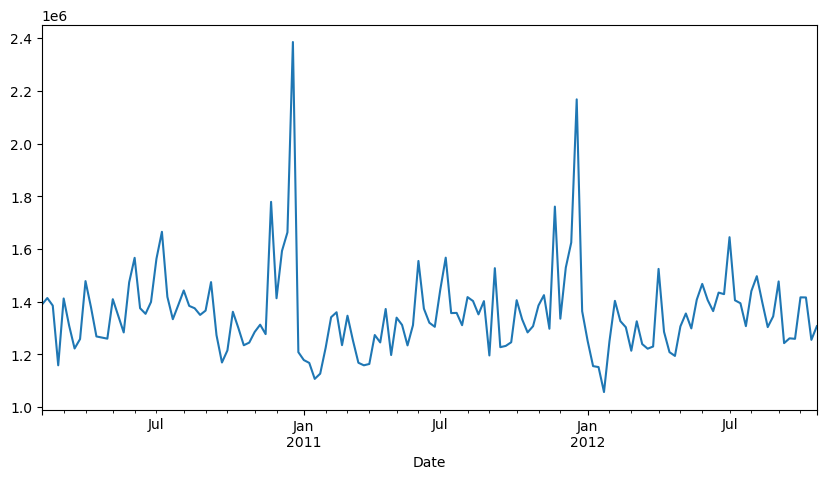

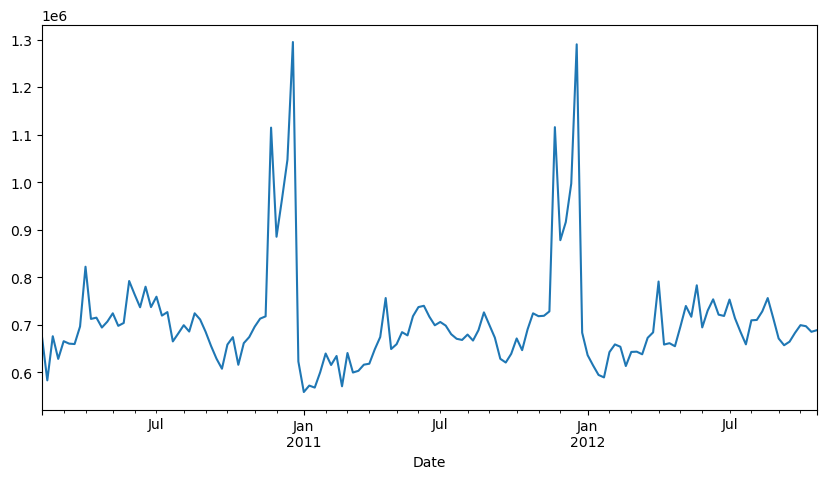

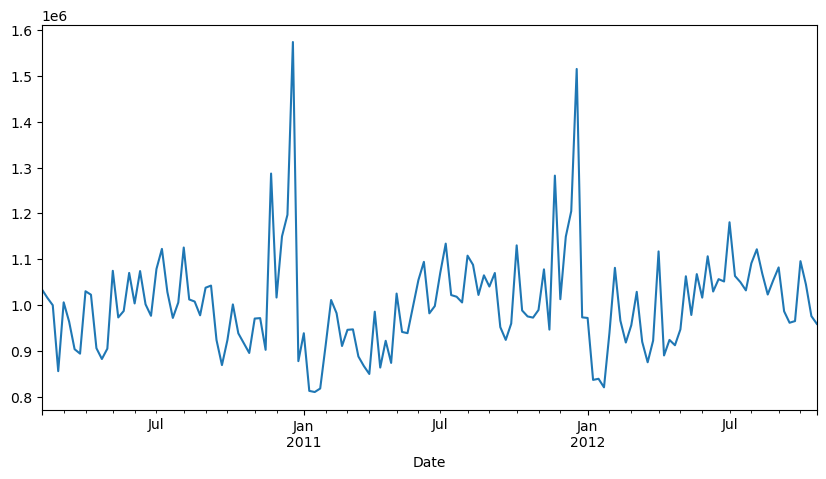

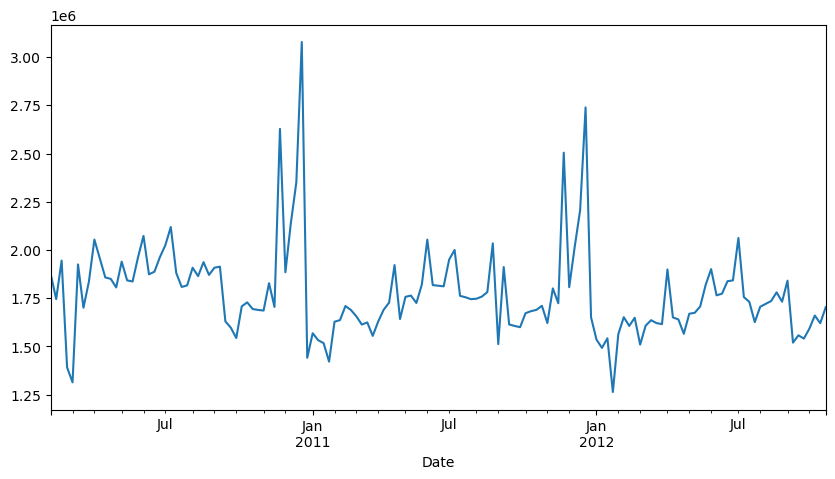

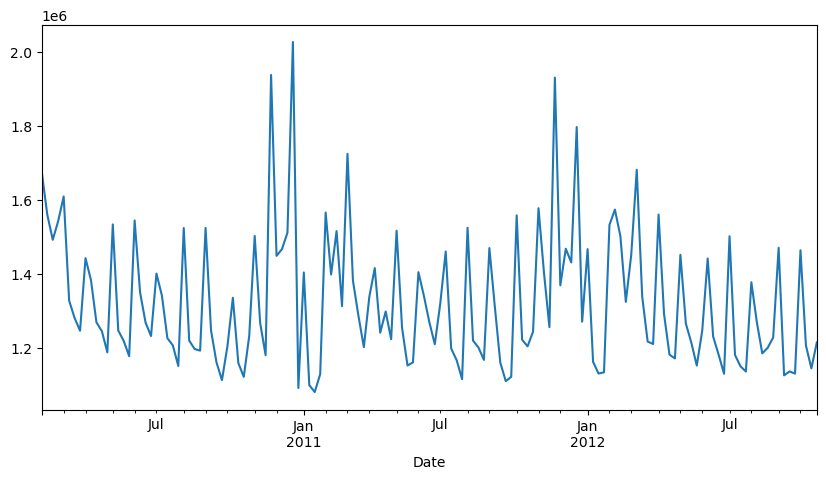

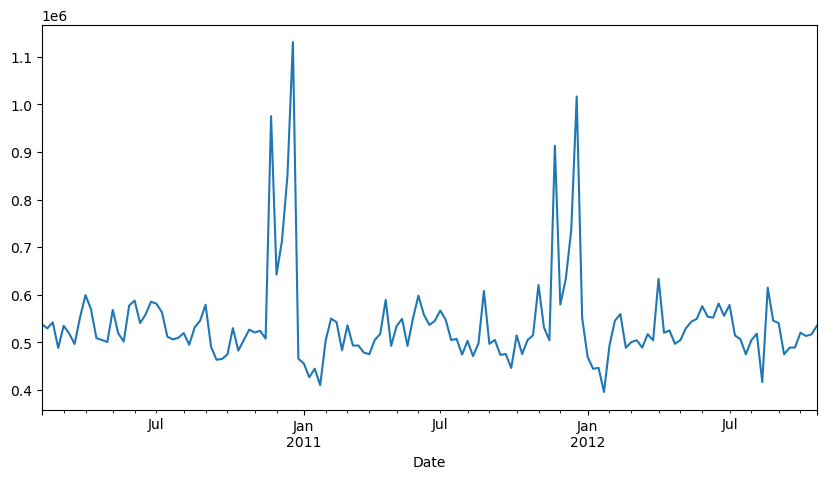

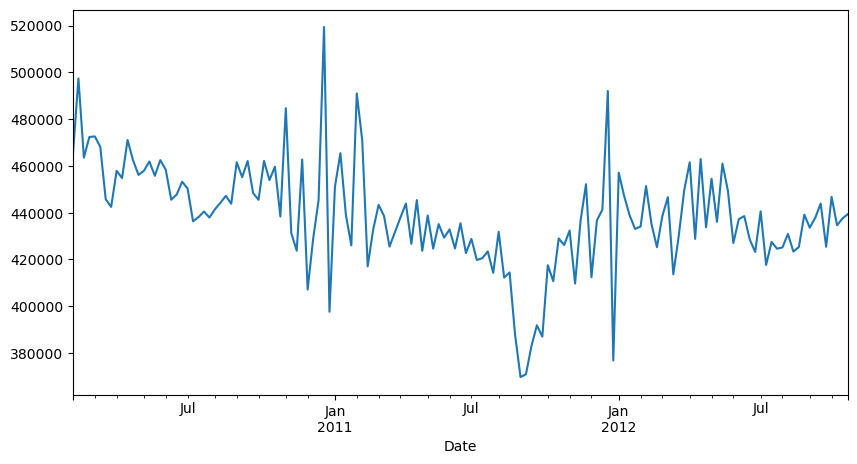

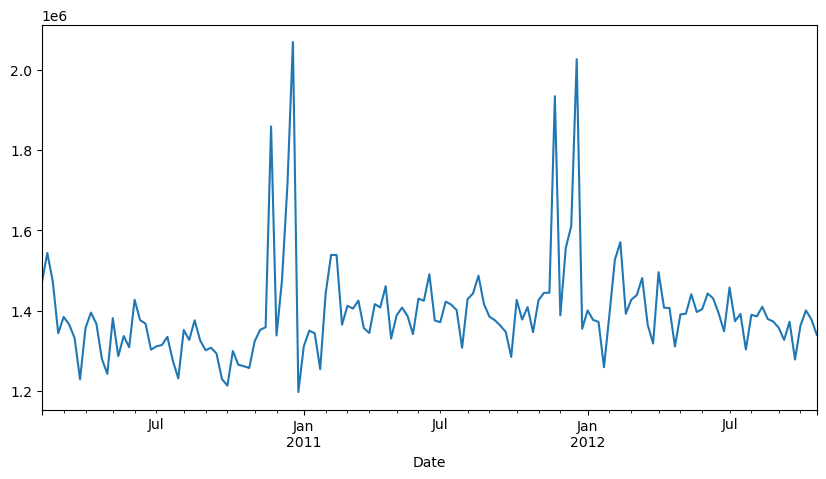

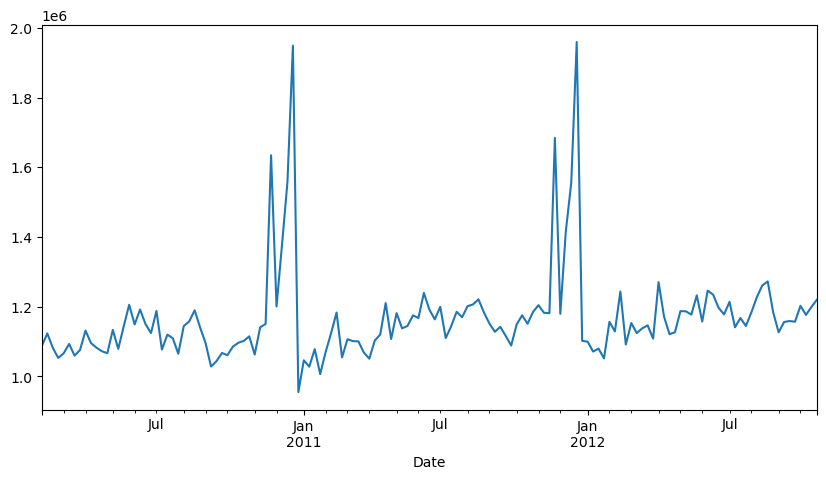

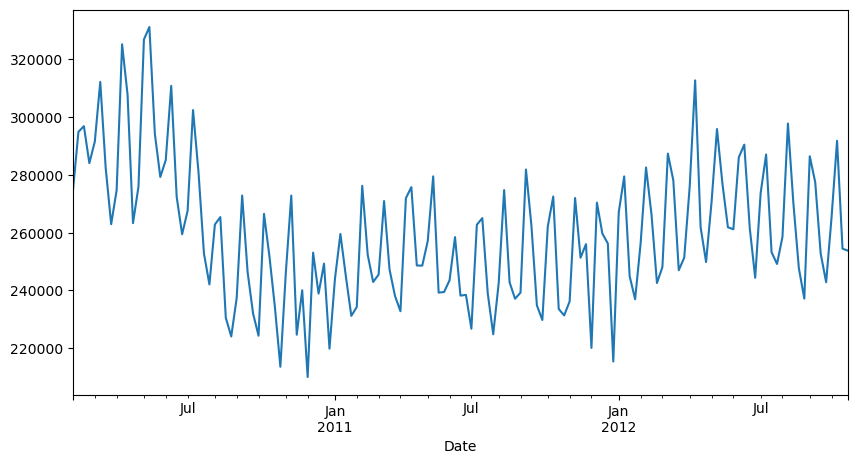

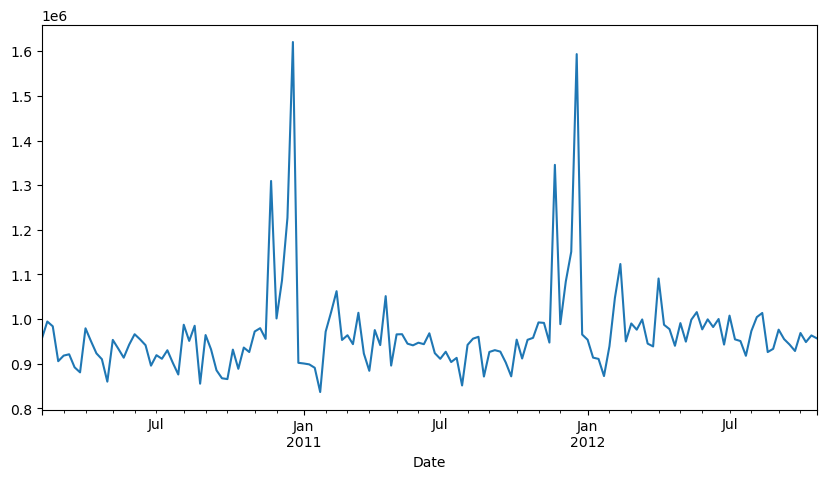

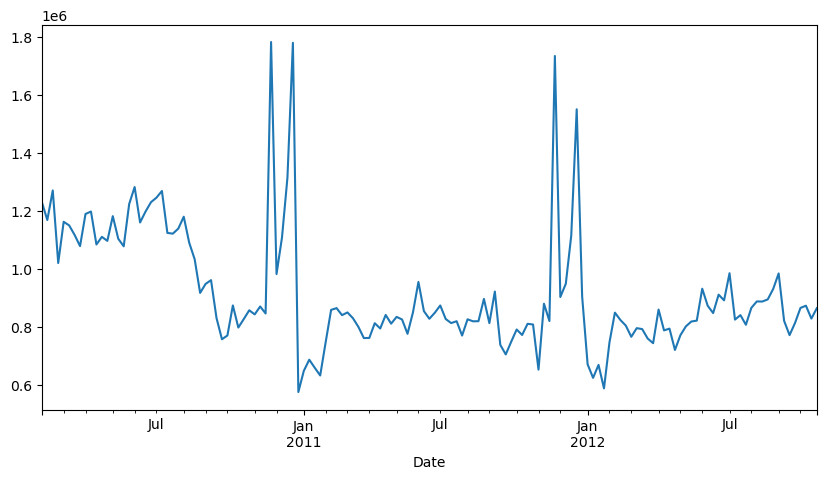

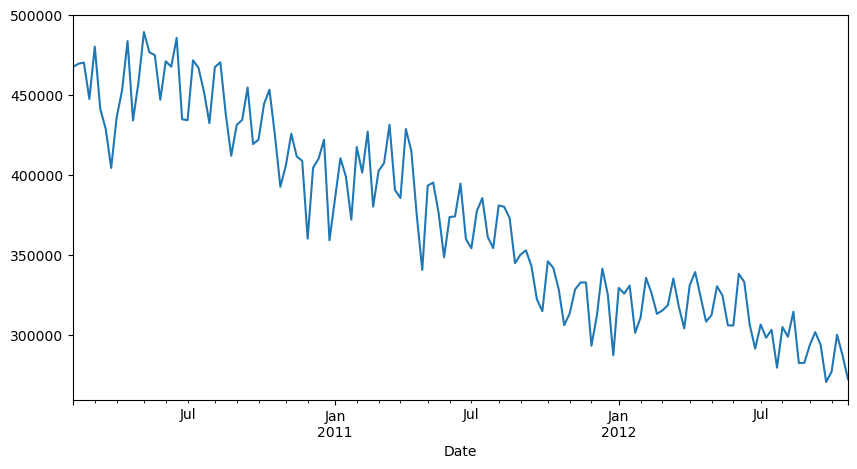

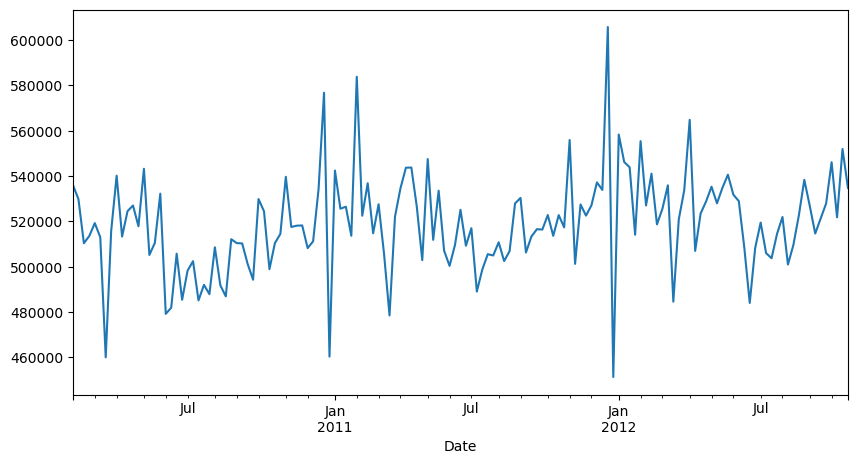

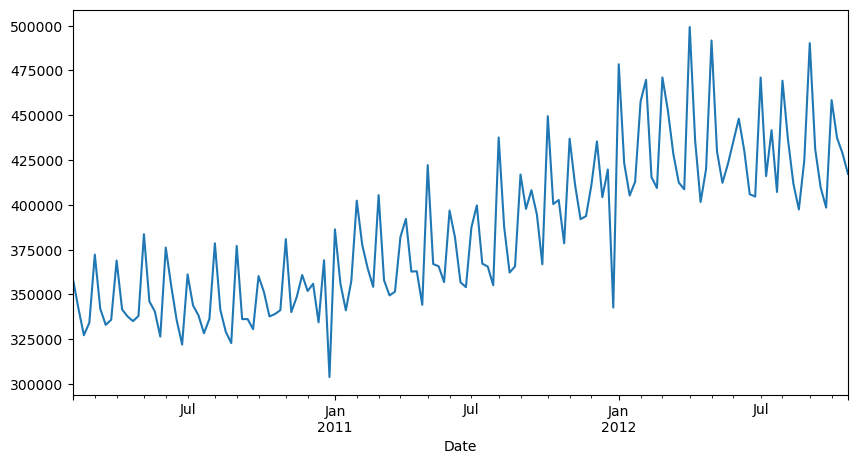

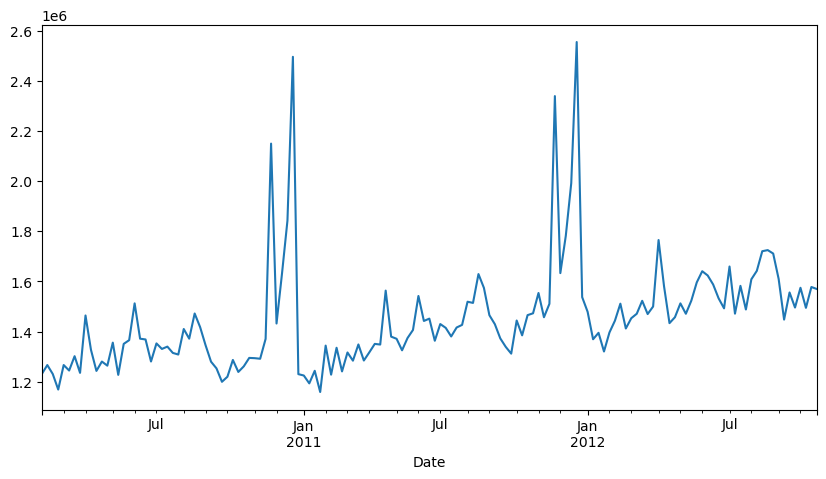

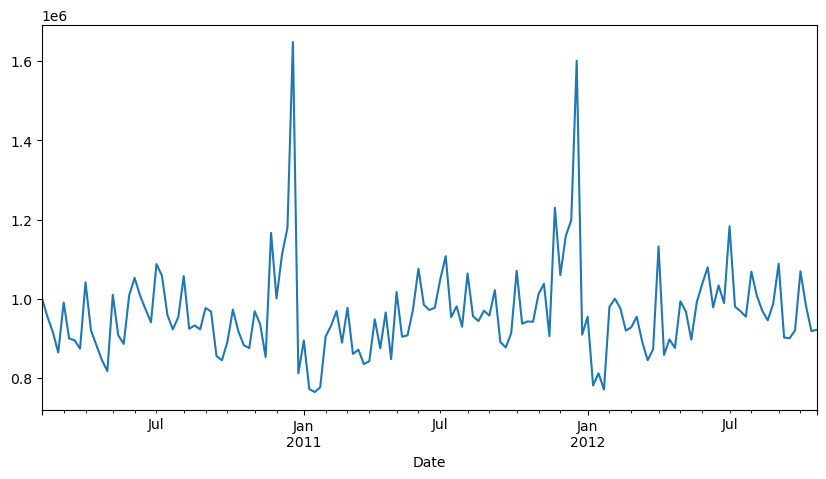

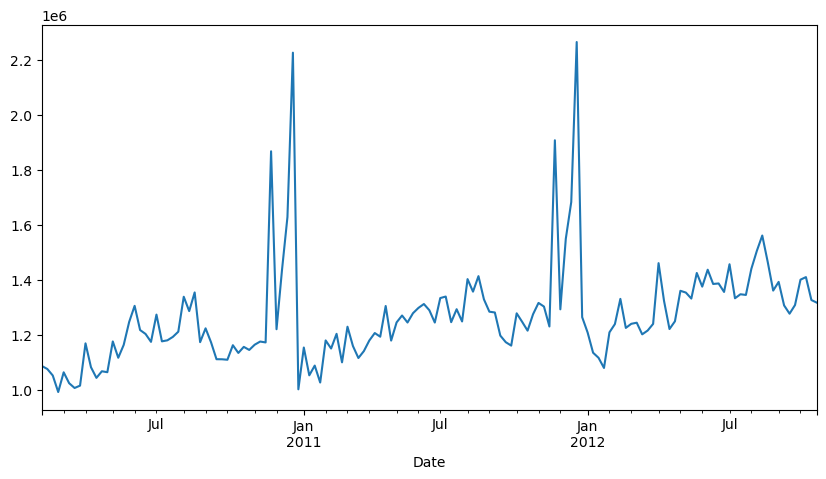

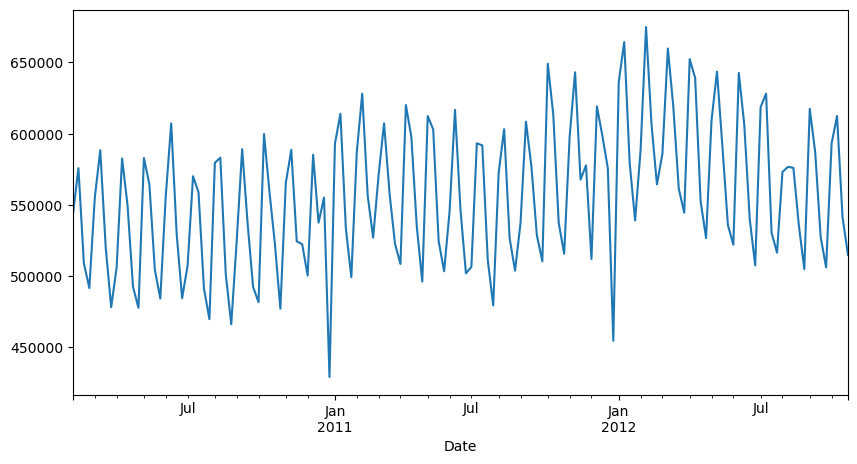

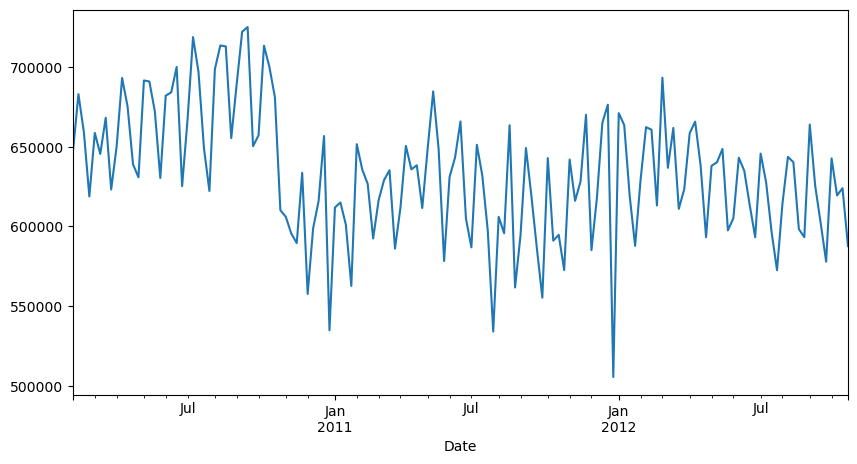

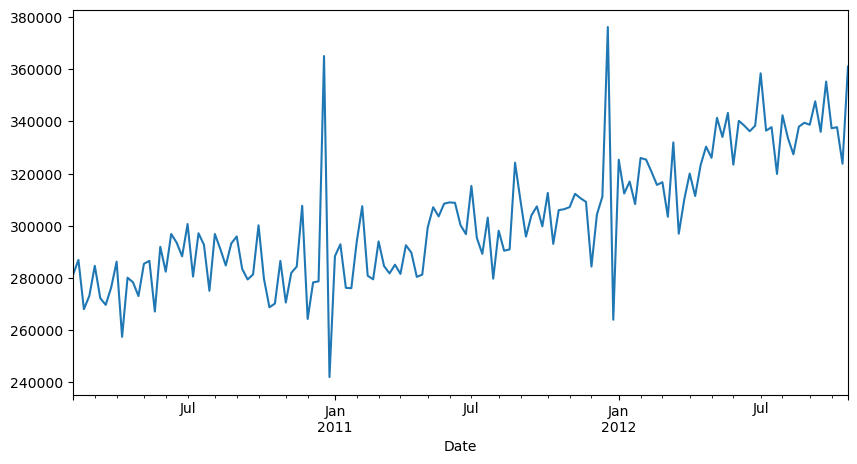

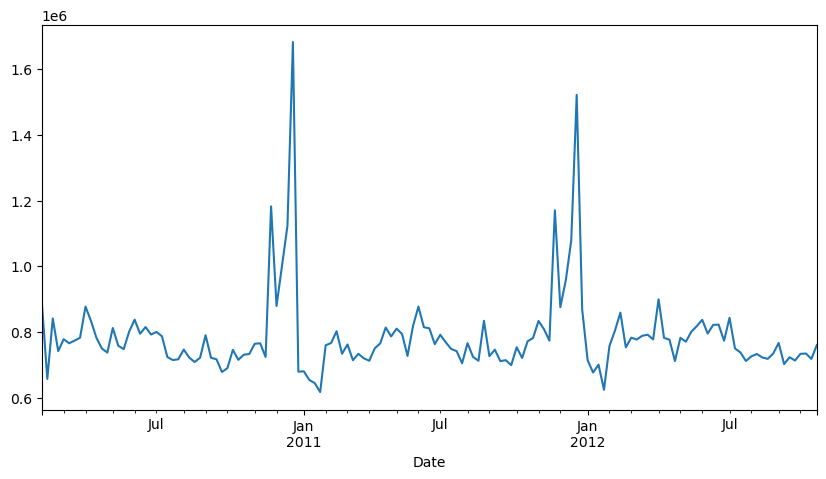

In [50]:
for i in data1['Store'].unique():
    plt.figure(figsize=(10,5))
    data1[data1['Store']==i].Weekly_Sales.plot()

In [68]:
### to check stationarity for store 1 using adfuller test

In [69]:
store1_sales = data1[data1['Store'] == 1]['Weekly_Sales']

In [83]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(store1_sales)

adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

if p_value <= 0.05:
    print('Result: Stationary (p-value <= 0.05)')
else:
    print('Result: Non-Stationary (p-value > 0.05)')

ADF Statistic: -5.102186145192287
p-value: 1.3877788330759535e-05
Result: Stationary (p-value <= 0.05)


In [88]:
# Compute the first difference and remove NaN
store1_sales = data1[data1['Store'] == 1]['Weekly_Sales']
store1_newdata = store1_sales.diff().dropna()

result_diff = adfuller(store1_newdata)

# Extracting p-value
p_value_diff = result_diff[1]

if p_value_diff <= 0.05:
    print('Result after first difference: Stationary (p-value <= 0.05)')
else:
    print('Result after first difference: Non-Stationary (p-value > 0.05)')

Result after first difference: Stationary (p-value <= 0.05)


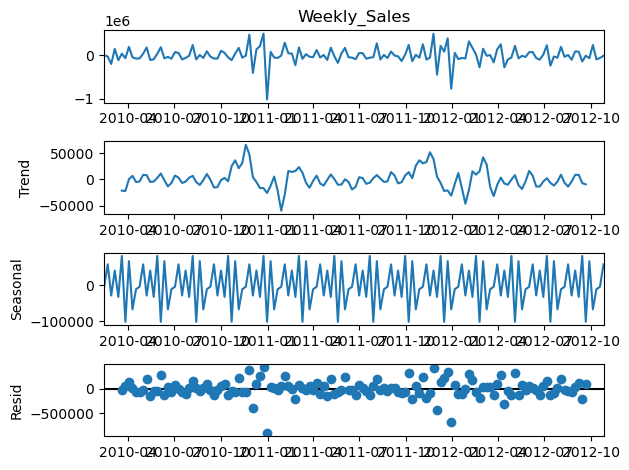

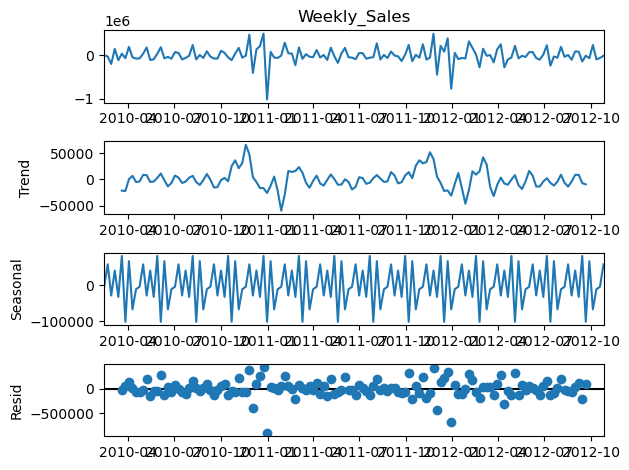

In [72]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(store1_newdata, model="additive",period=10)
decompose_data.plot()

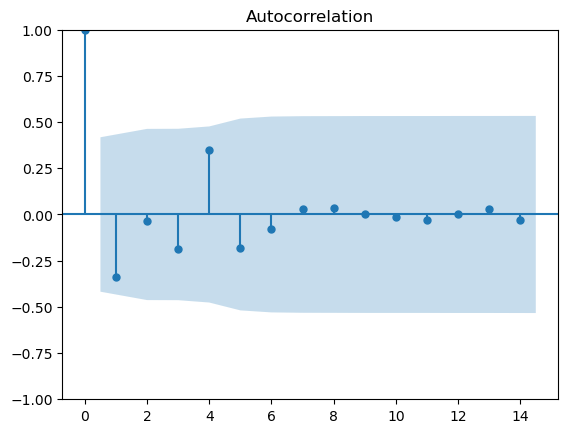

In [89]:
#plotting Autocorrelation

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(store1_newdata)
pacf_plot=pacf(store1_newdata)
plot_acf(acf_plot);

In [90]:
store1_newdata

Date
2010-02-12     -1733.46
2010-02-19    -29989.27
2010-02-26   -202240.58
2010-03-05    145079.09
2010-03-12   -115265.09
                ...    
2012-09-28    -69066.80
2012-10-05    233726.71
2012-10-12    -97713.16
2012-10-19    -65004.04
2012-10-26    -14409.03
Name: Weekly_Sales, Length: 142, dtype: float64

In [92]:
from statsmodels.tsa.arima.model import ARIMA
train = store1_newdata.iloc[:120]

model = ARIMA(train, order=(3,0,1))
model_fit = model.fit()
model_fit.summary()



C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  120
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -1608.615
Date:                Mon, 11 Sep 2023   AIC                           3229.230
Time:                        17:32:35   BIC                           3245.954
Sample:                    02-12-2010   HQIC                          3236.022
                         - 05-25-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -735.3862   7959.674     -0.092      0.926   -1.63e+04    1.49e+04
ar.L1         -0.8890      0.166     -5.352      0.000      -1.215      -0.563
ar.L2         -0.5699      0.095     -6.027      0.000      -0.755      -0.385
ar.L3         -0.4434      0.055     -8.012      0.000      -0.552      -0.335
ma.L1          0.3919      0.198      1.982      0.047       0.004       0.779
sigma2      2.703e+10      0.003   7.99e+12      0.000     2.7e+10     2.7e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                35.21
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               5.73   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.95e+28. Standard errors may be unstable.
"""

In [93]:
forecast_steps = 12

forecast = model_fit.get_forecast(steps=forecast_steps)

In [94]:
forecast_values = forecast.predicted_mean

print("Forecasted Sales for the Next 12 Weeks:")
print(forecast_values)


Forecasted Sales for the Next 12 Weeks:
2012-06-01    74119.719542
2012-06-08   -38235.739760
2012-06-15     7559.717962
2012-06-22   -19932.205609
2012-06-29    28232.318749
2012-07-06   -19226.945359
2012-07-13     7708.682744
2012-07-20   -10549.589777
2012-07-27    11377.221519
2012-08-03    -9655.274073
2012-08-10     4643.889288
2012-08-17    -5805.552208
Freq: W-FRI, Name: predicted_mean, dtype: float64


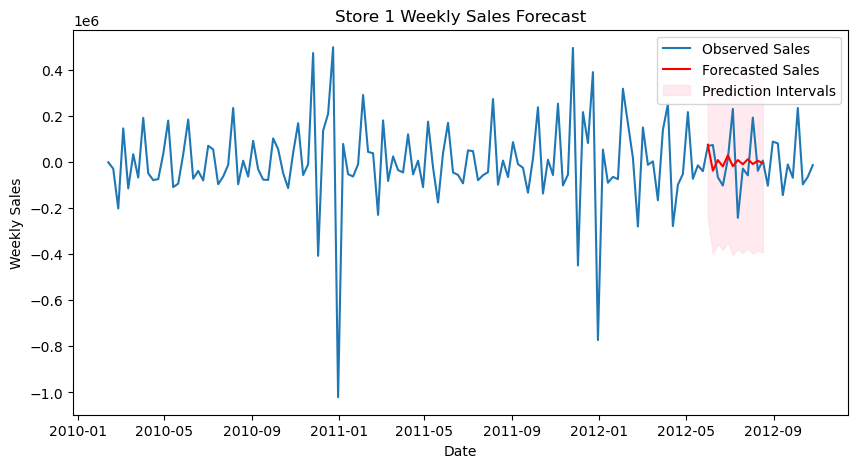

In [95]:
forecast_intervals = forecast.conf_int()

# Plotting with prediction intervals:
plt.figure(figsize=(10, 5))
plt.plot(store1_newdata, label='Observed Sales')
plt.plot(forecast_values.index, forecast_values.values, color='red', label='Forecasted Sales')
plt.fill_between(forecast_intervals.index, forecast_intervals.iloc[:, 0], forecast_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Prediction Intervals')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Store 1 Weekly Sales Forecast')
plt.show()